# Laboratorio 1 - Regresión

Estudiante 1: Juan Diego Niebles Navas - 202221193 \
Estudiante 2:  Esteban Benavides Velandia - 202220429\
Estudiante 3: Miguel Santiago Castillo Hernandez- 201633992

# 1. Entendimiento de los datos

En esta sección se va a escribir las características más relevantes de los datos y todo el perfilamiento de datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado.

In [1]:
# Instalación de paquetes necesarios

!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install seaborn -q
!pip install scikit-learn -q
!pip install joblib -q


#### 1.1 Volumen del Dataset

In [2]:
# Librerias generales

# Pandas
import pandas as pd
import math
pd.set_option('display.max_columns', 50) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar

# Random seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# math


# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from joblib import dump, load


db_location = './Datos/datos_entrenamiento_laboratorio1(train_data).csv'
data = pd.read_csv(db_location, sep=',')
data.shape 


(57934, 50)

In [3]:
display(data.sample(5))

Jugador Nacionalidad Posicion    Edad  \
39728       Lee Kangin       kr KOR       FW  23-243   
25541  Santiago Castro       ar ARG       FW  19-337   
57391         Ola Aina       ng NGA       LB  27-314   
23414     Pablo Maffeo       es ESP    RB,RW  27-297   
48348  Jonathan Clauss       fr FRA       RM  31-355   

                       Dia_partido  Goles  Tiros Totales   xG  npxG  xAG  \
39728    Saturday October 19, 2024      1              1  0.2   0.2  0.0   
25541     Saturday August 31, 2024      0              3  0.1   0.1  0.0   
57391     Saturday August 17, 2024      0              1  0.0   0.0  0.0   
23414           Monday May 5, 2025      0              0  0.0   0.0  0.0   
48348  Saturday September 14, 2024      0              0  0.0   0.0  0.4   

       xAG.1  Acciones_que_crean_tiros  Pases_intentados  Pases_intentados.1  \
39728    0.0                         2                14                  14   
25541    0.0                         1                19                  19   
57391    0.0                         1                33                  33   
23414    0.0                         0                42                  42   
48348    0.4                         4                45                  45   

       Pases_intentados.2  Pases_progresivos  Pases_progresivos.1  \
39728                  14                  2                    2   
25541                  19                  2                    2   
57391                  33                  4                    4   
23414                  42                  0                    0   
48348                  45                  1                    1   

       Regates_exitosos  Regates_exitosos.1  Pases_medios_completados  \
39728                 0                   0                         1   
25541                 0                   0                         5   
57391                 0                   0                         6   
23414                 4                   4                        15   
48348                 1                   1                        11   

       Pases_largos_completados  xAG.2  xAG.3   xA  Pases_en_ultimo_tercio  \
39728                         4    0.0    0.0  0.4                       1   
25541                         3    0.0    0.0  0.1                       1   
57391                         0    0.0    0.0  0.0                       1   
23414                         1    0.0    0.0  0.0                       2   
48348                         6    0.4    0.4  0.2                       2   

       Pases_balon_vivo  Pases_balon_muerto  Pases_al_hueco  Pases_centros  \
39728                 9                   3               2              0   
25541                17                   2               0              1   
57391                26                   7               0              1   
23414                35                   7               0              1   
48348                37                   7               0              4   

       Pases_completados  Pases_completados.1  Pases_completados.2  \
39728                 10                   10                   10   
25541                 16                   16                   16   
57391                 22                   22                   22   
23414                 37                   37                   37   
48348                 35                   35                   35   

       Pases_fuera_de_juego  Valla_no_vencida  Errores_defnsivos_ocasion_tiro  \
39728                     2                 0                               0   
25541                     0                 0                               0   
57391                     0                 2                               0   
23414                     0                 1                               0   
48348                     1                 5                               0   

       Toques_en_zona_ofensiva  Toques_e

#### 1.2 Valores nulos

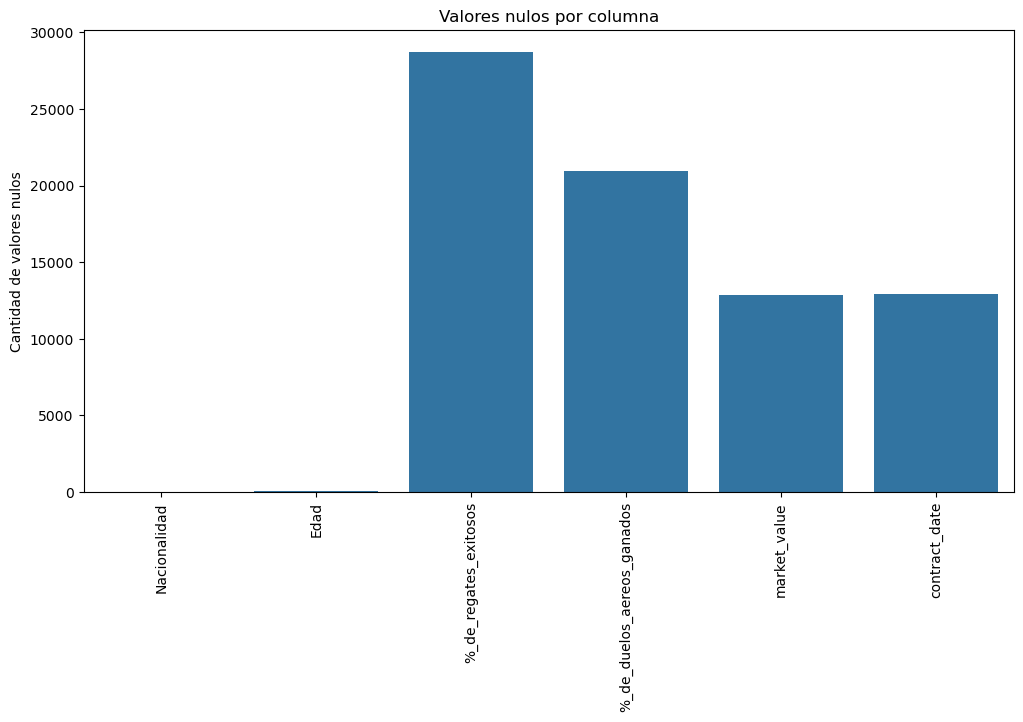

Nacionalidad: 32
Edad: 48
%_de_regates_exitosos: 28722
%_de_duelos_aereos_ganados: 20957
market_value: 12894
contract_date: 12916


In [4]:
# Nulos por columna

columns = data.columns
nulls_per_column = {}
for col in columns:
    if data[col].isnull().sum() > 0:
        nulls_per_column[col] = data[col].isnull().sum()

plt.figure(figsize=(12,6))
sns.barplot(x=list(nulls_per_column.keys()), y=list(nulls_per_column.values()))
plt.xticks(rotation=90)
plt.ylabel("Cantidad de valores nulos")
plt.title('Valores nulos por columna')
plt.show()


for col_name, null_count in nulls_per_column.items():
    if null_count > 0:
        print(f"{col_name}: {null_count}")


#### 1.3 Detección y eliminación de columnas duplicadas

In [5]:
# columnas repetidas

data.T.duplicated().sum()
data.T[data.T.duplicated(keep=False)].T

xAG xAG.1 Pases_intentados Pases_intentados.1 Pases_intentados.2  \
0      0.0   0.0               60                 60                 60   
1      0.7   0.7               30                 30                 30   
2      0.1   0.1               33                 33                 33   
3      0.1   0.1               33                 33                 33   
4      0.2   0.2               11                 11                 11   
...    ...   ...              ...                ...                ...   
57929  0.0   0.0               16                 16                 16   
57930  0.0   0.0                4                  4                  4   
57931  0.0   0.0               32                 32                 32   
57932  0.0   0.0               35                 35                 35   
57933  0.0   0.0                9                  9                  9   

      Pases_progresivos Pases_progresivos.1 Regates_exitosos  \
0                     6                   6                1   
1                     2                   2                0   
2                     1                   1                1   
3                     1                   1                1   
4                     0                   0                0   
...                 ...                 ...              ...   
57929                 0                   0                0   
57930                 1                   1                0   
57931                 3                   3                2   
57932                 3                   3                0   
57933                 1                   1                1   

      Regates_exitosos.1 xAG.2 xAG.3 Pases_centros Pases_completados  \
0                      1   0.0   0.0             8                43   
1                      0   0.7   0.7             1                22   
2                      1   0.1   0.1             2                28   
3                      1   0.1   0.1             2                28   
4                      0   0.2   0.2             1                10   
...                  ...   ...   ...           ...               ...   
57929                  0   0.0   0.0             2                12   
57930                  0   0.0   0.0             0                 4   
57931                  2   0.0   0.0             1                29   
57932                  0   0.0   0.0             3                27   
57933                  1   0.0   0.0             0                 8   

      Pases_completados.1 Pases_completados.2 Centros  
0                      43                  43       8  
1                      22                  22       1  
2                      28                  28       2  
3                      28                  28       2  
4                      10                  10       1  
...                   ...                 ...     ...  
57929                  12                  12       2  
57930                   4                   4       0  
57931                  29                  29       1  
57932                  27                  27       3  
57933                   8                   8       0  

[57934 rows x 16 columns]

In [6]:
# Borrar columnas repetidas
data = data.loc[:,~data.T.duplicated()]
data.shape


(57934, 40)

#### 1.4 Tipos de datos

In [7]:
# Tipo de dato de cada columna. Nos sirve para identificar columnas categóricas y numéricas y cuales no son la categoría que deberian ser
data.dtypes 

Jugador                            object
Nacionalidad                       object
Posicion                           object
Edad                               object
Dia_partido                        object
Goles                               int64
Tiros Totales                       int64
xG                                float64
npxG                              float64
xAG                               float64
Acciones_que_crean_tiros            int64
Pases_intentados                    int64
Pases_progresivos                   int64
Regates_exitosos                    int64
Pases_medios_completados            int64
Pases_largos_completados            int64
xA                                float64
Pases_en_ultimo_tercio              int64
Pases_balon_vivo                    int64
Pases_balon_muerto                  int64
Pases_al_hueco                      int64
Pases_centros                       int64
Pases_completados                   int64
Pases_fuera_de_juego              

##### 1.4.1 Arreglando Market_value

Es importante arreglar este tipo de dato ya que como es el valor objetivo se necesita ver las relaciones con esta variable



In [8]:
# arreglando market_value

data[['cantidad', 'sufijo']] = data['market_value'].replace({  '-': np.nan, "error": np.nan}, regex=True).str.extract(r'€?([\d\.]+)([mk]?)')
data['cantidad'] = data['cantidad'].astype(float)

# Convertir según sufijo
data['precio_millones'] = data.apply(
    lambda row: row['cantidad'] * 1000000 if row['sufijo'] == 'm' else row['cantidad']*1000 if row['sufijo'] == 'k' else row['cantidad'],
    axis=1
)

data[['market_value', 'cantidad', 'sufijo', 'precio_millones']].sample(10)



market_value  cantidad sufijo  precio_millones
21071          NaN       NaN    NaN              NaN
45887      €22.00m      22.0      m       22000000.0
21823       €1.20m       1.2      m        1200000.0
1362       €10.00m      10.0      m       10000000.0
41290       €1.80m       1.8      m        1800000.0
25535       €4.00m       4.0      m        4000000.0
47167      €35.00m      35.0      m       35000000.0
9731       €90.00m      90.0      m       90000000.0
25020       €7.00m       7.0      m        7000000.0
3757       €30.00m      30.0      m       30000000.0

In [9]:
data = data.drop(columns=['cantidad', 'sufijo'])


#### 1.5 Estadisticas descriptivas 

##### 1.5.1 Descripción variables numericas

In [10]:
# Seleccionar las columnas numéricas
number_columns = data.select_dtypes(include=[np.number]).columns

data[number_columns].describe()


Goles  Tiros Totales            xG          npxG           xAG  \
count  57934.000000   57934.000000  57934.000000  57934.000000  57934.000000   
mean       0.513015       0.792402      0.088635      0.080473      0.062784   
std       16.440600       1.158538      0.209810      0.186549      0.152033   
min       -5.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.000000       0.000000      0.000000      0.000000      0.000000   
50%        0.000000       0.000000      0.000000      0.000000      0.000000   
75%        0.000000       1.000000      0.100000      0.100000      0.100000   
max      995.000000      12.000000      2.900000      2.900000      2.100000   

       Acciones_que_crean_tiros  Pases_intentados  Pases_progresivos  \
count              57934.000000      57934.000000       57934.000000   
mean                   1.416750         31.659716           2.416232   
std                    1.727395         22.963272           2.756341   
min                    0.000000          0.000000           0.000000   
25%                    0.000000         13.000000           0.000000   
50%                    1.000000         28.000000           2.000000   
75%                    2.000000         45.000000           4.000000   
max                   16.000000        171.000000          30.000000   

       Regates_exitosos  Pases_medios_completados  Pases_largos_completados  \
count      57934.000000              57934.000000              57934.000000   
mean           0.487451                 11.226309                  2.341941   
std            0.897683                 10.984869                  2.867533   
min            0.000000                  0.000000                  0.000000   
25%            0.000000                  3.000000                  0.000000   
50%            0.000000                  8.000000                  1.000000   
75%            1.000000                 16.000000                  3.000000   
max           15.000000                 95.000000                 24.000000   

                 xA  Pases_en_ultimo_tercio  Pases_balon_vivo  \
count  57934.000000            57934.000000      57934.000000   
mean       0.055056                1.976232         28.593900   
std        0.122355                2.583320         21.511297   
min        0.000000                0.000000          0.000000   
25%        0.000000                0.000000         12.000000   
50%        0.000000                1.000000         24.000000   
75%        0.100000                3.000000         40.000000   
max        1.400000               37.000000        170.000000   

       Pases_balon_muerto  Pases_al_hueco  Pases_centros  Pases_completados  \
count        57934.000000    57934.000000   57934.000000       57934.000000   
mean             2.956140        0.096196       1.133652          25.745624   
std              3.733981        0.342576       2.005869          20.703206   
min              0.000000        0.000000       0.000000           0.000000   
25%              0.000000        0.000000       0.000000           9.000000   
50%              1.000000        0.000000       0.000000          21.000000   
75%              4.000000        0.000000       1.000000          37.000000   
max             35.000000        8.000000      25.000000         163.000000   

       Pases_fuera_de_juego  Valla_no_vencida  Errores_defnsivos_ocasion_tiro  \
count          57934.000000      57934.000000                    57934.000000   
mean               0.109677          1.502727                        0.041513   
std                0.345491          2.169317                        0.207865   
min                0.000000          0.000000                        0.000000   
25%                0.000000          0.000000                        0.000000   
50%                0.000000          1.000000                        0.000000   
75%                0.000000          2.000000                      

Podemos evidenciar la presencia de datos fuera de lo normal. Por ejemplo, goles negativos o muy altos o un precio de 9 millones de euros para un jugador.

##### 1.5.2 Cajas y bigotes para detectar patrones

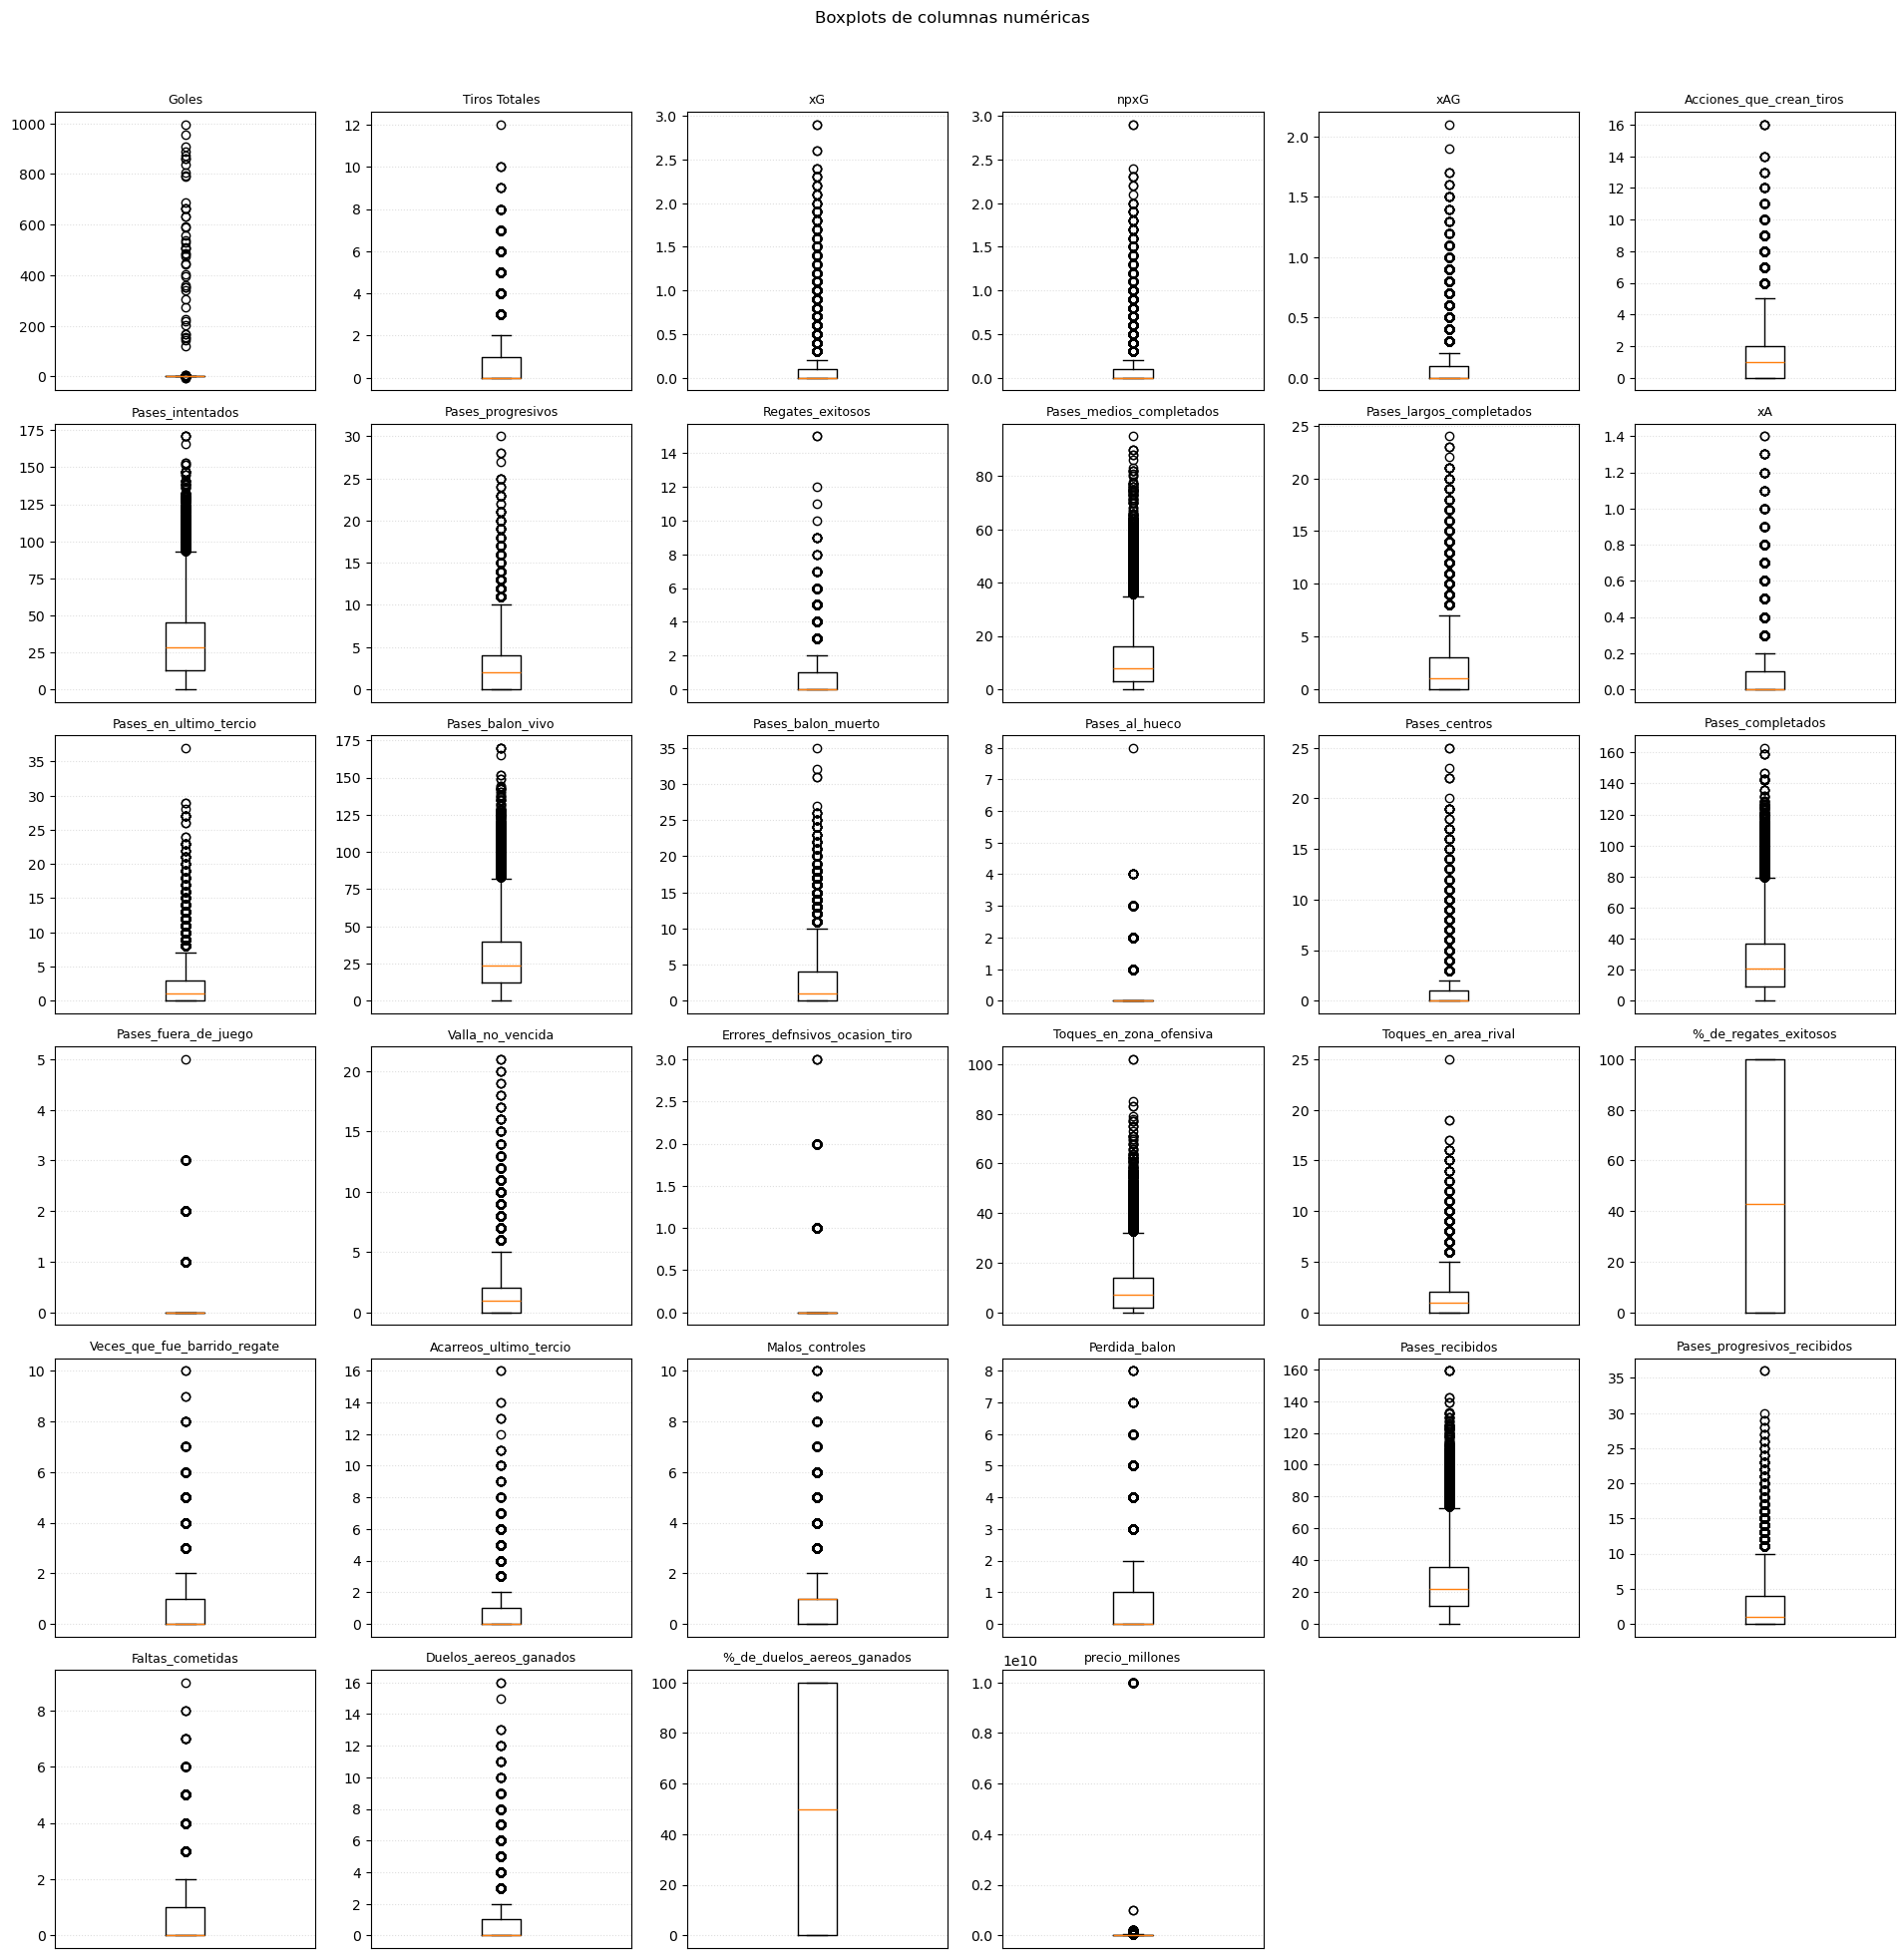

In [11]:
n = len(number_columns)

cols = 6 if n > 20 else 4
rows = math.ceil(n / cols)

# Tamaño de figura proporcional a la grilla
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3.2, rows * 3.2))
axes = axes.flatten() if n > 1 else [axes]

for i, col in enumerate(number_columns):
    serie = data[col].dropna()
    # Boxplot por columna
    axes[i].boxplot(serie, vert=True, showfliers=True, whis=1.5)
    axes[i].set_title(str(col), fontsize=9)
    axes[i].set_xticks([])  # sin etiquetas en x para evitar ruido visual
    axes[i].grid(True, axis='y', linestyle=':', alpha=0.4)

# Ocultar ejes sobrantes si la grilla es mayor que la cantidad de columnas
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

fig.suptitle('Boxplots de columnas numéricas', fontsize=12, y=1.02)
plt.tight_layout()
plt.show()


##### 1.5.2 Estadisticas especificas variable objetivo

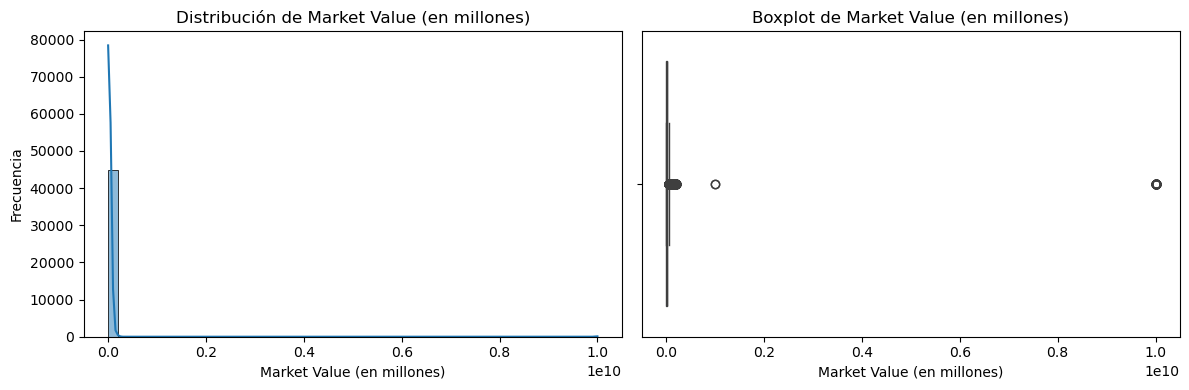

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma 
sns.histplot(data['precio_millones'].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Market Value (en millones)')
axes[0].set_xlabel('Market Value (en millones)')
axes[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=data['precio_millones'].dropna(), ax=axes[1])
axes[1].set_title('Boxplot de Market Value (en millones)')
axes[1].set_xlabel('Market Value (en millones)')

plt.tight_layout()  # Ajusta automáticamente los espacios
plt.show()

##### 1.5.3 Correlaciones 

In [13]:
col_objetivo = 'precio_millones'
correlaciones = data.corr(numeric_only=True)[col_objetivo].drop(col_objetivo)
correlaciones = correlaciones.sort_values(ascending=False)

print(correlaciones)

Goles                             0.589467
Pases_recibidos                   0.022306
Pases_balon_vivo                  0.020446
Pases_completados                 0.019978
Pases_medios_completados          0.017640
Pases_intentados                  0.017546
Pases_progresivos                 0.016144
xG                                0.013942
Toques_en_zona_ofensiva           0.013156
Pases_en_ultimo_tercio            0.011416
Acciones_que_crean_tiros          0.011209
Toques_en_area_rival              0.010978
npxG                              0.010182
Tiros Totales                     0.009810
Pases_largos_completados          0.009422
Perdida_balon                     0.009271
xAG                               0.007332
Pases_progresivos_recibidos       0.006949
Regates_exitosos                  0.006545
xA                                0.006299
Veces_que_fue_barrido_regate      0.005888
Acarreos_ultimo_tercio            0.005435
Pases_al_hueco                    0.005337
Pases_fuera

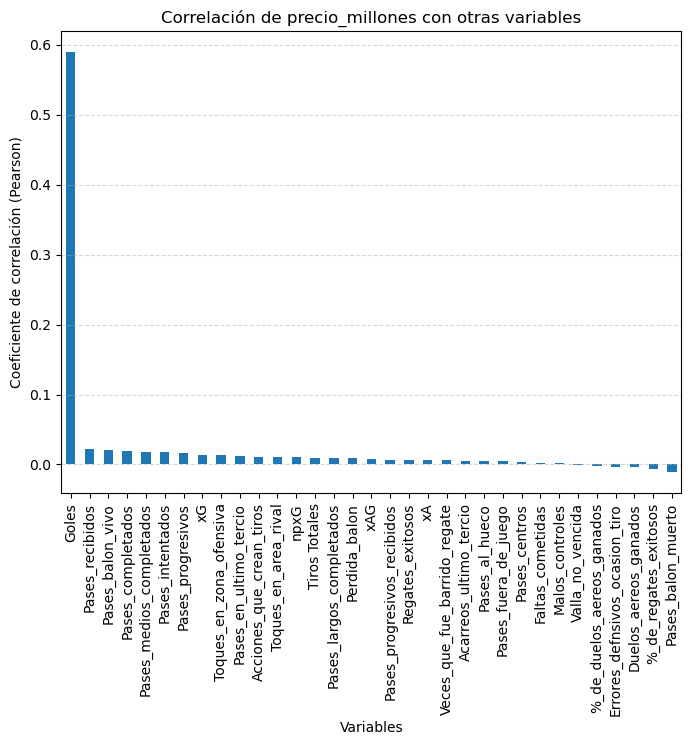

In [14]:
plt.figure(figsize=(8,6))
correlaciones.plot(kind='bar')
plt.title(f'Correlación de {col_objetivo} con otras variables')
plt.ylabel('Coeficiente de correlación (Pearson)')
plt.xlabel('Variables')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

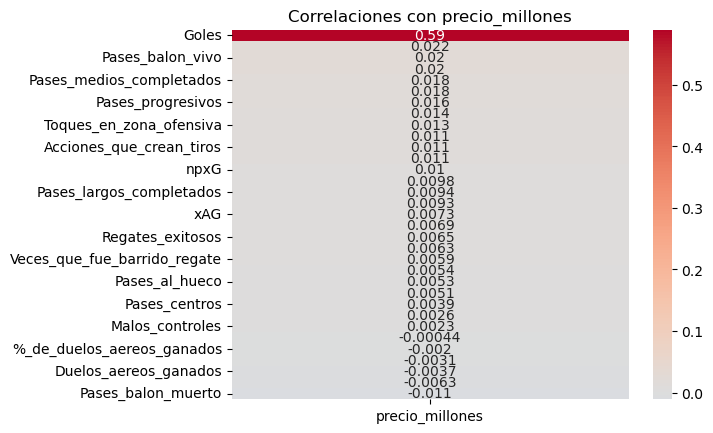

In [15]:
sns.heatmap(correlaciones.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlaciones con {col_objetivo}')
plt.show()

##### 1.5.4 Correlaciones entre variables

Esta correlación sirve para encontrar columnas redundantes

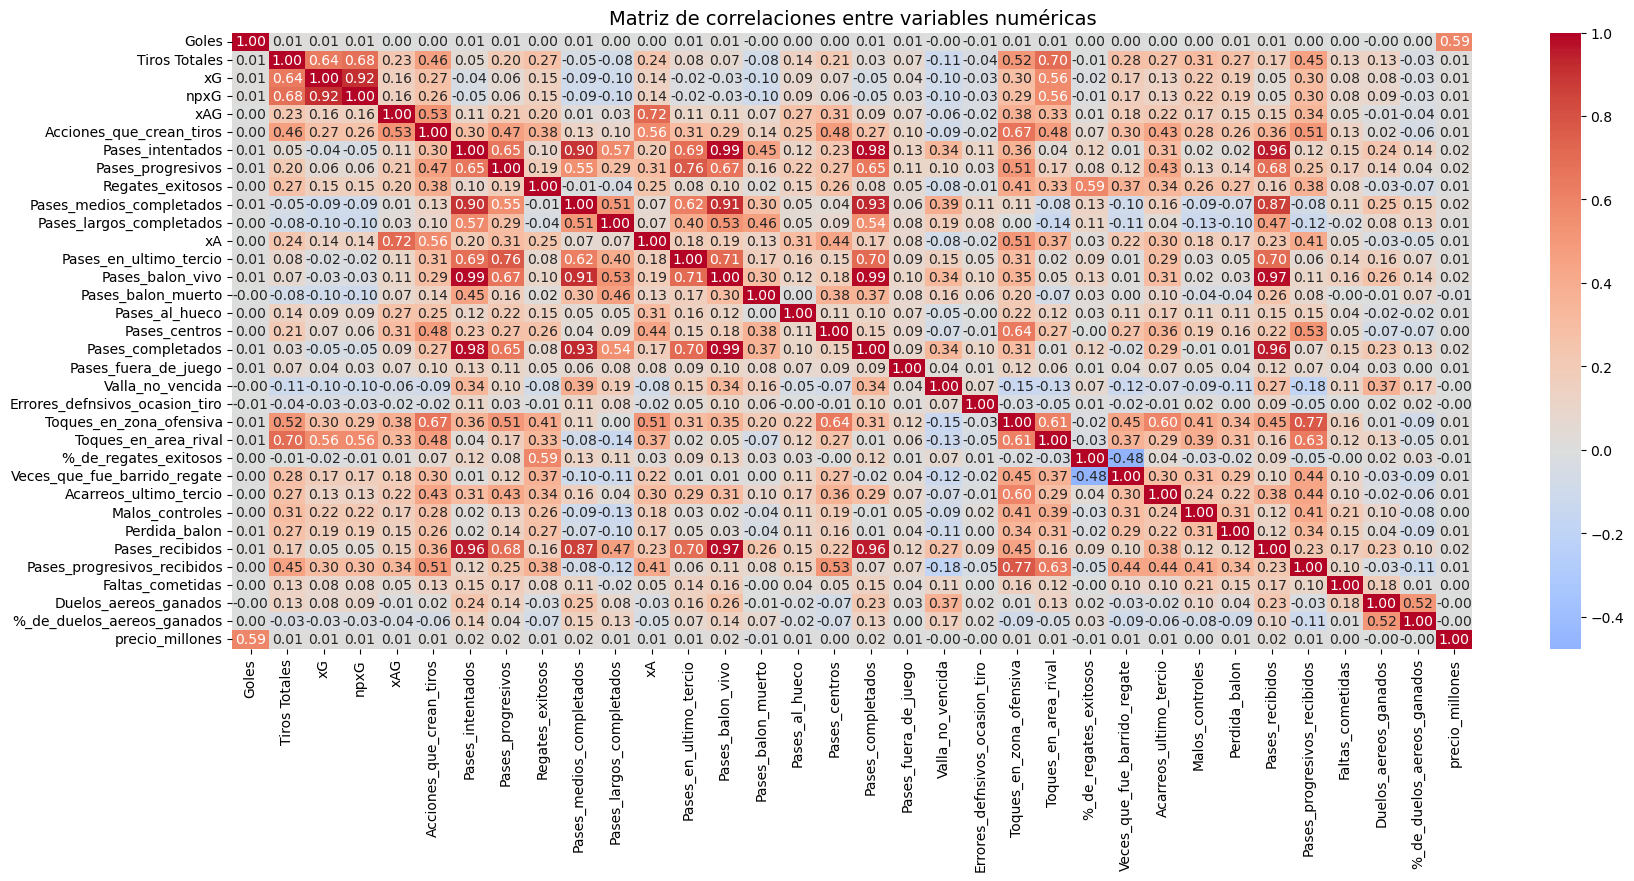

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlaciones entre variables numéricas", fontsize=14)
plt.show()

##### 1.6 Conclusión entendimiento de los datos

La fuente de datos que se tiene es un csv que contiene 57934 filas y 50 columnas, las cuales contiene la información de jugadores de futbol. La información del data set incluye información básica como nombre, edad y nacionalidad al igual que estadísticas de desempeño de los jugadores (goles, pases, etc). Este data set contiene 34 columnas numéricas enteras, 9 columnas numéricas decimales y 7 columnas categóricas. En cuanto a que tan completos están los datos, se tienen 75569 valores nulos en múltiples columnas, por ejemplo columnas como edad, nacionalidad y otras presentan valores nulos. Adicional a esto se tienen 10 columnas repetidas que se deberían tratar antes de usar los datos para entrenar el modelo. Estos datos representan parcialmente la situación real, porque aunque se tienen datos estadísticos de futbolistas hay algunas alertas dentro de estos. Valores de goles muy altos (900+ goles en un partido) o edades con formatos raros (“24-231”) lo cual sugiere que igual se deben revisar los datos antes de usarlos. Por ultimo en las tendencias de las variables, estadísticas claves como goles tienen distribuciones donde predomina el valor 0, al igual que con tiros totales y xG en donde los valores son generalmente bajos, por debajo de 1. Con esto terminamos el análisis inicial de los datos para saber que calidad tienen antes de empezar a trabajar con estos.


##### 1.7 Descripción del proceso de selección de variables:

Se realizó la elección de la gran mayoría de las variables númericas basandose en la necesidad de capturar el rendimiento multidimensional de los jugadores. Por tanto, excluir variables a priori podría sesgar el análisis ya que de momento no es posible determinar con tanta exactitud cuáles son las más influyentes dado la existencia de datos atipicos que corrompen las correlaciones. Sin embargo, basandose en las correlaciones existentes, y en nuestro conocimiento de fútbol, sí que se puede intuir cuáles pueden llegar a ser más importantes, estas son: Jugador, Nacionalidad, Posición, Edad, Día del partido, Goles, Pases recibidos, Pases con balón en vivo, Pases completados, Pases intentados, xG (goles esperados), Precio en millones. Así, se va a enfocar la limpieza de los datos principalmente en el cuidado de estas variables.

# 2. preparacion de datos (Estudiante 2)
##### 2.1 Selccion de los datos
Se genera una lista con las varibeles que se consideraron las mas importantates y que afectan más el market_value de un jugador. Para trabajar con estas variables.

In [17]:
variables = ["Jugador", "Nacionalidad", "Posicion", "Edad", "Dia_partido", "Goles", "Pases_recibidos", "Pases_balon_vivo", "Pases_completados", "Pases_intentados", "xG", "precio_millones"]
dfescojido = data.copy()
display(dfescojido.head())

Jugador Nacionalidad Posicion    Edad             Dia_partido  \
0     Bruno Fernandes       pt POR    FW,AM  29-343  Friday August 16, 2024   
1     Marcus Rashford      eng ENG       LW  26-290  Friday August 16, 2024   
2         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
3         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
4  Alejandro Garnacho       ar ARG       RW  20-046  Friday August 16, 2024   

   Goles  Tiros Totales   xG  npxG  xAG  Acciones_que_crean_tiros  \
0      0              6  1.2   1.2  0.0                         2   
1      0              0  0.0   0.0  0.7                         1   
2      0              0  0.0   0.0  0.1                         1   
3     -5              0  0.0   0.0  0.1                         1   
4      0              2  0.7   0.7  0.2                         3   

   Pases_intentados  Pases_progresivos  Regates_exitosos  \
0                60                  6                 1   
1                30                  2                 0   
2                33                  1                 1   
3                33                  1                 1   
4                11                  0                 0   

   Pases_medios_completados  Pases_largos_completados   xA  \
0                        14                         4  0.0   
1                         2                         1  0.1   
2                         6                         1  0.1   
3                         6                         1  0.1   
4                         3                         0  0.1   

   Pases_en_ultimo_tercio  Pases_balon_vivo  Pases_balon_muerto  \
0                       4                51                   8   
1                       2                30                   0   
2                       1                28                   4   
3                       1                28                   4   
4                       0                11                   0   

   Pases_al_hueco  Pases_centros  Pases_completados  Pases_fuera_de_juego  \
0               0              8                 43                     1   
1               0              1                 22                     0   
2               0              2                 28                     1   
3               0              2                 28                     1   
4               0              1                 10                     0   

   Valla_no_vencida  Errores_defnsivos_ocasion_tiro  Toques_en_zona_ofensiva  \
0                 0                               0                       36   
1                 1                               0                       26   
2                 0                               0                       22   
3                 0                               0                       22   
4                 1                               0                       10   

   Toques_en_area_rival  %_de_regates_exitosos  Veces_que_fue_barrido_regate  \
0                     3                  100.0                             0   
1                     4                    0.0                             5   
2                     3                  100.0                             0   
3                     3                  100.0                             0   
4                     3                    0.0                             1   

   Acarreos_ultimo_tercio  Malos_controles  Perdida_balon  Pases_recibidos  \
0                       5                1              2               51   
1                       1                2              1               37   
2                       4                2              2               26   
3                       4                2              2               26   
4                       0                2              1               12   

   Pases_progresivos_recibidos  Faltas_cometidas  Duelos_aereos_ganados  \
0                 

### Ingeniería de características

### Estandarización de datos y limpieza de datos
Primero vamos a hacer una integracion de las fechas poniendo todas en un mismo formato

In [18]:
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" North", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" West", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" Derby", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" El", "")
dfescojido.loc[:, "Dia_partido"] = dfescojido["Dia_partido"].str.replace(" Choc", "")
dfescojido.loc[:, "Dia_partido"] = pd.to_datetime(dfescojido["Dia_partido"], format="%A %B %d, %Y")


dfescojido.loc[:, "Edad"] = dfescojido["Edad"].str.replace("-", ".")
dfescojido.to_csv("dfescojido_limpio.csv", index=False)


para la estandarisacion y la limpieza de datos vamos a usar una grafica de cajas y bigotes para definir cuales son los datos atipicos y despues poder solucionar este problema.

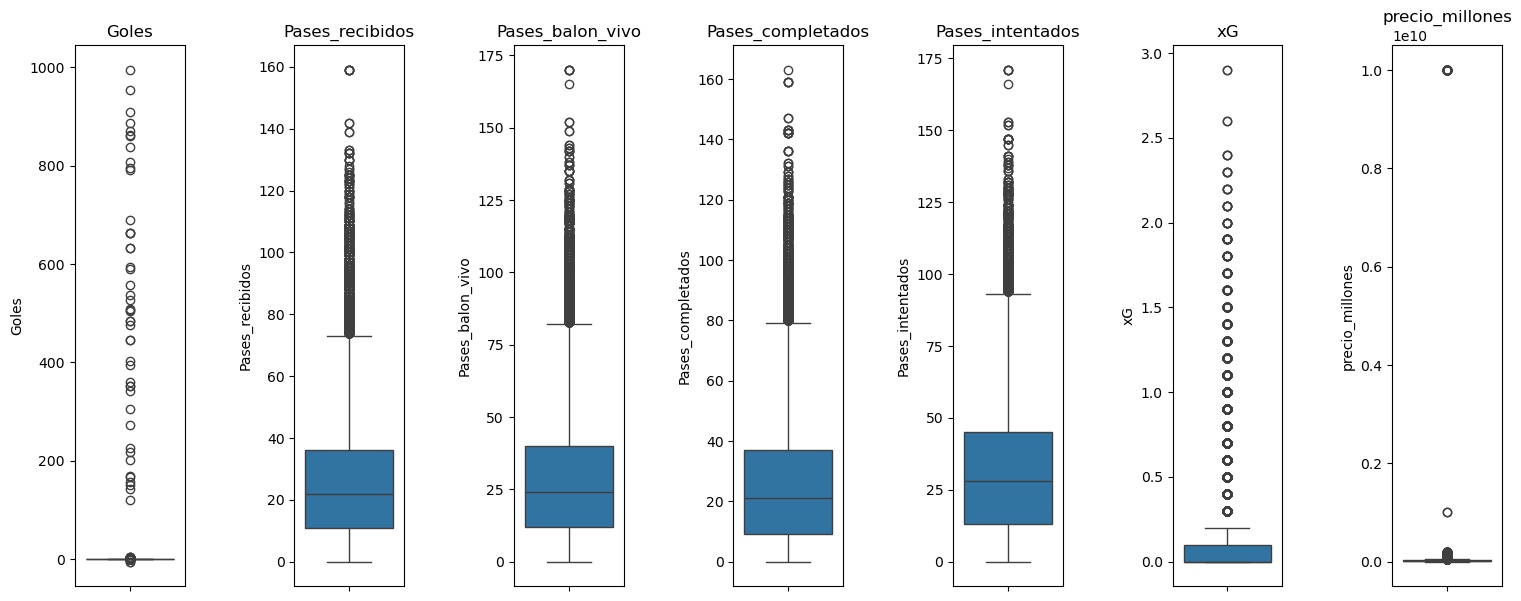

In [19]:
dfescojido.loc["Edad"] = dfescojido["Edad"].astype(float)

l = dfescojido.dtypes

number_columns = dfescojido[["Jugador", "Nacionalidad", "Posicion", "Edad", "Dia_partido", "Goles", "Pases_recibidos", "Pases_balon_vivo", "Pases_completados", "Pases_intentados", "xG", "precio_millones"]].select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(15, 6))

plt.tight_layout()

for i, variable in enumerate(number_columns):
    sns.boxplot(y=dfescojido[variable], ax=axes[i])
    axes[i].set_title(f"{variable}")
plt.subplots_adjust(wspace=1) 
plt.show()

Como nos podemos dar cuenta los que tienen menos centido son los goles metidos en un partido y precio del jugador en millones, tienen muchos valore atipicos que no hacen nada de sentido. Lo primero que vamos ha hacer es quitra los datos duplicados y un jugador no puede jugar dos o más partidos el mismo dia trataremos estos tambein como datos duplicados. En la base de datos algunos jugadores juegan dos partidos el mismo dia, tomaremos los datos mas nomrales con respecto al grafico anterior de cada partido para solo dejarel un partido ese dia. 

In [20]:
dfescojido = dfescojido.sort_values(by=["Jugador", "Dia_partido"], ascending=False)
limitadoPrecio = dfescojido[(dfescojido['precio_millones'] >= 0) & (dfescojido['precio_millones'] <= 500000000)]
mediaPrecioJugador = limitadoPrecio.groupby('Jugador')['precio_millones'].mean()
print(mediaPrecioJugador)
limitadoGoles = dfescojido[(dfescojido['Goles'] >= 0) & (dfescojido['Goles'] <= 13)]
mediaGolesJugador = limitadoGoles.groupby('Jugador')['Goles'].mean()
print(mediaGolesJugador)

for jugador, media in mediaPrecioJugador.items():
    dfescojido.loc[
        (dfescojido['Jugador'] == jugador) & 
        (dfescojido['precio_millones'] < 0) & 
        (dfescojido['precio_millones'] > 500000000), 
        'precio_millones'
    ] = round(media)

dfescojido = dfescojido.dropna(subset=['precio_millones'])
dfescojido = dfescojido[(dfescojido['precio_millones'] >= 0) & (dfescojido['precio_millones'] <= 500000000)]

for jugador, media in mediaGolesJugador.items():
    dfescojido.loc[
        (dfescojido['Jugador'] == jugador) & 
        (dfescojido['Goles'] < 0) & 
        (dfescojido['Goles'] > 13), 
        'Goles'
    ] = round(media)


dfescojido = dfescojido.dropna(subset=['Goles'])
dfescojido = dfescojido[(dfescojido['Goles'] >= 0) & (dfescojido['Goles'] <= 13)]
display(dfescojido)
dfescojido.to_csv("dfescojido.csv", index=False)

Jugador
Aaron Ciammaglichella      700000.0
Aaron Martin              6500000.0
Aaron Ramsdale           13000000.0
Aaron WanBissaka         24000000.0
Abakar Sylla             10000000.0
                            ...    
Zeki Celik                6000000.0
Zion Suzuki              15000000.0
Zito Luvumbo              5000000.0
Ørjan Nyland               900000.0
Þorir Johann Helgason     3000000.0
Name: precio_millones, Length: 1533, dtype: float64
Jugador
Aaron Ciammaglichella    0.000000
Aaron Cresswell          0.000000
Aaron Malouda            0.000000
Aaron Martin             0.000000
Aaron Ramsdale           0.000000
                           ...   
Ørjan Nyland             0.000000
Þorir Johann Helgason    0.000000
Đorđe Petrovic           0.000000
Łukasz Fabianski         0.000000
Łukasz Skorupski         0.111111
Name: Goles, Length: 2242, dtype: float64


Jugador Nacionalidad Posicion    Edad  \
37429  Þorir Johann Helgason       is ISL       LM  24.239   
37176  Þorir Johann Helgason       is ISL       AM  24.232   
36746  Þorir Johann Helgason       is ISL       AM  24.225   
36325  Þorir Johann Helgason       is ISL       DM  24.217   
36110  Þorir Johann Helgason       is ISL       LW  24.211   
...                      ...          ...      ...     ...   
25891           Aaron Martin       es ESP    LB,WB  27.146   
25653           Aaron Martin       es ESP       WB  27.132   
25197           Aaron Martin       es ESP       WB  27.124   
24784           Aaron Martin       es ESP    WB,LM  27.117   
25245  Aaron Ciammaglichella       it ITA       CM  19.212   

               Dia_partido  Goles  Tiros Totales   xG  npxG  xAG  \
37429  2025-05-25 00:00:00    0.0            0.0  0.0   0.0  0.0   
37176  2025-05-18 00:00:00    0.0            1.0  0.1   0.1  0.1   
36746  2025-05-11 00:00:00    0.0            0.0  0.0   0.0  0.0   
36325  2025-05-03 00:00:00    0.0            2.0  0.1   0.1  0.0   
36110  2025-04-27 00:00:00    0.0            0.0  0.0   0.0  0.0   
...                    ...    ...            ...  ...   ...  ...   
25891  2024-09-15 00:00:00    0.0            1.0  0.0   0.0  0.3   
25653  2024-09-01 00:00:00    0.0            0.0  0.0   0.0  0.1   
25197  2024-08-24 00:00:00    0.0            1.0  0.0   0.0  0.0   
24784  2024-08-17 00:00:00    0.0            0.0  0.0   0.0  0.0   
25245  2024-08-25 00:00:00    0.0            0.0  0.0   0.0  0.0   

       Acciones_que_crean_tiros  Pases_intentados  Pases_progresivos  \
37429                       1.0               9.0                0.0   
37176                       1.0              12.0                1.0   
36746                       0.0              30.0                3.0   
36325                       0.0              23.0                1.0   
36110                       0.0               4.0                1.0   
...                         ...               ...                ...   
25891                       9.0              56.0                6.0   
25653                       2.0              55.0                5.0   
25197                       4.0              40.0                5.0   
24784                       2.0              32.0                1.0   
25245                       0.0               0.0                0.0   

       Regates_exitosos  Pases_medios_completados  Pases_largos_completados  \
37429               1.0                       2.0                       1.0   
37176               0.0                       3.0                       1.0   
36746               1.0                      12.0                       5.0   
36325               0.0                       3.0                       4.0   
36110               0.0                       2.0                       0.0   
...                 ...                       ...                       ...   
25891               0.0                       8.0                       6.0   
25653               0.0                      19.0                       6.0   
25197               0.0                      12.0                       2.0   
24784               1.0                      10.0                       1.0   
25245               0.0                       0.0                       0.0   

        xA  Pases_en_ultimo_tercio  Pases_balon_vivo  Pases_balon_muerto  \
37429  0.0                     0.0               5.0                 4.0   
37176  0.1                     0.0               8.0                 4.0   
36746  0.0                     1.0              24.0                 6.0   
36325  0.0                     3.0              22.0                 1.0   
36110  0.0                     1.0               4.0                 0.0   
...    ...                     ...               ...                 ...   
25891  0.7                     5.0              45.0                11.0   
25653  0.6                     6.0   

In [21]:

dfescojido = dfescojido.drop_duplicates()


dfescojido.loc[
        (dfescojido['Jugador'] == "Fer Lopez"), "Nacionalidad"
    ] = "es ESP"

dfescojido.loc[
        (dfescojido['Jugador'] == "Mateus Mane"), "Nacionalidad"
    ] = "pt POR"
display(dfescojido)

Jugador Nacionalidad Posicion    Edad  \
37429  Þorir Johann Helgason       is ISL       LM  24.239   
37176  Þorir Johann Helgason       is ISL       AM  24.232   
36746  Þorir Johann Helgason       is ISL       AM  24.225   
36325  Þorir Johann Helgason       is ISL       DM  24.217   
36110  Þorir Johann Helgason       is ISL       LW  24.211   
...                      ...          ...      ...     ...   
25891           Aaron Martin       es ESP    LB,WB  27.146   
25653           Aaron Martin       es ESP       WB  27.132   
25197           Aaron Martin       es ESP       WB  27.124   
24784           Aaron Martin       es ESP    WB,LM  27.117   
25245  Aaron Ciammaglichella       it ITA       CM  19.212   

               Dia_partido  Goles  Tiros Totales   xG  npxG  xAG  \
37429  2025-05-25 00:00:00    0.0            0.0  0.0   0.0  0.0   
37176  2025-05-18 00:00:00    0.0            1.0  0.1   0.1  0.1   
36746  2025-05-11 00:00:00    0.0            0.0  0.0   0.0  0.0   
36325  2025-05-03 00:00:00    0.0            2.0  0.1   0.1  0.0   
36110  2025-04-27 00:00:00    0.0            0.0  0.0   0.0  0.0   
...                    ...    ...            ...  ...   ...  ...   
25891  2024-09-15 00:00:00    0.0            1.0  0.0   0.0  0.3   
25653  2024-09-01 00:00:00    0.0            0.0  0.0   0.0  0.1   
25197  2024-08-24 00:00:00    0.0            1.0  0.0   0.0  0.0   
24784  2024-08-17 00:00:00    0.0            0.0  0.0   0.0  0.0   
25245  2024-08-25 00:00:00    0.0            0.0  0.0   0.0  0.0   

       Acciones_que_crean_tiros  Pases_intentados  Pases_progresivos  \
37429                       1.0               9.0                0.0   
37176                       1.0              12.0                1.0   
36746                       0.0              30.0                3.0   
36325                       0.0              23.0                1.0   
36110                       0.0               4.0                1.0   
...                         ...               ...                ...   
25891                       9.0              56.0                6.0   
25653                       2.0              55.0                5.0   
25197                       4.0              40.0                5.0   
24784                       2.0              32.0                1.0   
25245                       0.0               0.0                0.0   

       Regates_exitosos  Pases_medios_completados  Pases_largos_completados  \
37429               1.0                       2.0                       1.0   
37176               0.0                       3.0                       1.0   
36746               1.0                      12.0                       5.0   
36325               0.0                       3.0                       4.0   
36110               0.0                       2.0                       0.0   
...                 ...                       ...                       ...   
25891               0.0                       8.0                       6.0   
25653               0.0                      19.0                       6.0   
25197               0.0                      12.0                       2.0   
24784               1.0                      10.0                       1.0   
25245               0.0                       0.0                       0.0   

        xA  Pases_en_ultimo_tercio  Pases_balon_vivo  Pases_balon_muerto  \
37429  0.0                     0.0               5.0                 4.0   
37176  0.1                     0.0               8.0                 4.0   
36746  0.0                     1.0              24.0                 6.0   
36325  0.0                     3.0              22.0                 1.0   
36110  0.0                     1.0               4.0                 0.0   
...    ...                     ...               ...                 ...   
25891  0.7                     5.0              45.0                11.0   
25653  0.6                     6.0   

In [22]:
nacimiento =  pd.to_datetime("24/05/2004", format="%d/%m/%Y")

indeces_fer = dfescojido.loc[
        (dfescojido['Jugador'] == "Fer Lopez")
    ].index

for i in indeces_fer:
    edadp =  (dfescojido["Dia_partido"][i] - nacimiento)
    años = edadp.days // 365
    dias = round((((edadp.days / 365) - años) *365)/1000, 4 )

    totalAños = float(años) + float(dias)

    dfescojido["Edad"][i] = float(totalAños)


nacimiento =  pd.to_datetime("16/11/2007", format="%d/%m/%Y")

indeces_fer = dfescojido.loc[
        (dfescojido['Jugador'] == "Mateus Mane") &
        (dfescojido['Edad'].isnull())
    ].index

for i in indeces_fer:
    edadp =  (dfescojido["Dia_partido"][i] - nacimiento)
    años = edadp.days // 365
    dias = round((((edadp.days / 365) - años) *365)/1000, 4 )

    totalAños = float(años) + float(dias)

    dfescojido["Edad"][i] = float(totalAños)

display(dfescojido)

C:\Users\diego\AppData\Local\Temp\ipykernel_9196\4165859275.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfescojido["Edad"][i] = float(totalAños)
C:\Users\diego\AppData\Local\Temp\ipykernel_9196\4165859275.py:14: FutureWarning: Chain

Jugador Nacionalidad Posicion    Edad  \
37429  Þorir Johann Helgason       is ISL       LM  24.239   
37176  Þorir Johann Helgason       is ISL       AM  24.232   
36746  Þorir Johann Helgason       is ISL       AM  24.225   
36325  Þorir Johann Helgason       is ISL       DM  24.217   
36110  Þorir Johann Helgason       is ISL       LW  24.211   
...                      ...          ...      ...     ...   
25891           Aaron Martin       es ESP    LB,WB  27.146   
25653           Aaron Martin       es ESP       WB  27.132   
25197           Aaron Martin       es ESP       WB  27.124   
24784           Aaron Martin       es ESP    WB,LM  27.117   
25245  Aaron Ciammaglichella       it ITA       CM  19.212   

               Dia_partido  Goles  Tiros Totales   xG  npxG  xAG  \
37429  2025-05-25 00:00:00    0.0            0.0  0.0   0.0  0.0   
37176  2025-05-18 00:00:00    0.0            1.0  0.1   0.1  0.1   
36746  2025-05-11 00:00:00    0.0            0.0  0.0   0.0  0.0   
36325  2025-05-03 00:00:00    0.0            2.0  0.1   0.1  0.0   
36110  2025-04-27 00:00:00    0.0            0.0  0.0   0.0  0.0   
...                    ...    ...            ...  ...   ...  ...   
25891  2024-09-15 00:00:00    0.0            1.0  0.0   0.0  0.3   
25653  2024-09-01 00:00:00    0.0            0.0  0.0   0.0  0.1   
25197  2024-08-24 00:00:00    0.0            1.0  0.0   0.0  0.0   
24784  2024-08-17 00:00:00    0.0            0.0  0.0   0.0  0.0   
25245  2024-08-25 00:00:00    0.0            0.0  0.0   0.0  0.0   

       Acciones_que_crean_tiros  Pases_intentados  Pases_progresivos  \
37429                       1.0               9.0                0.0   
37176                       1.0              12.0                1.0   
36746                       0.0              30.0                3.0   
36325                       0.0              23.0                1.0   
36110                       0.0               4.0                1.0   
...                         ...               ...                ...   
25891                       9.0              56.0                6.0   
25653                       2.0              55.0                5.0   
25197                       4.0              40.0                5.0   
24784                       2.0              32.0                1.0   
25245                       0.0               0.0                0.0   

       Regates_exitosos  Pases_medios_completados  Pases_largos_completados  \
37429               1.0                       2.0                       1.0   
37176               0.0                       3.0                       1.0   
36746               1.0                      12.0                       5.0   
36325               0.0                       3.0                       4.0   
36110               0.0                       2.0                       0.0   
...                 ...                       ...                       ...   
25891               0.0                       8.0                       6.0   
25653               0.0                      19.0                       6.0   
25197               0.0                      12.0                       2.0   
24784               1.0                      10.0                       1.0   
25245               0.0                       0.0                       0.0   

        xA  Pases_en_ultimo_tercio  Pases_balon_vivo  Pases_balon_muerto  \
37429  0.0                     0.0               5.0                 4.0   
37176  0.1                     0.0               8.0                 4.0   
36746  0.0                     1.0              24.0                 6.0   
36325  0.0                     3.0              22.0                 1.0   
36110  0.0                     1.0               4.0                 0.0   
...    ...                     ...               ...                 ...   
25891  0.7                     5.0              45.0                11.0   
25653  0.6                     6.0   

Se quitan algunas columnas que tienen nullos que no se pueden dedusir y otras columnas que no son nesesarias para el modelo. Ademas se combierte numerico la Nacionalidad para poder relacionarlo y usaurse en el modelo.

In [23]:
Limpo = dfescojido.drop(columns=['%_de_duelos_aereos_ganados'])
Limpo = dfescojido.drop(columns=['%_de_regates_exitosos' ])
Limpo = dfescojido.drop(columns=['market_value'])
Limpo = dfescojido.drop(columns=['contract_date'])

Limpo = pd.get_dummies(dfescojido, columns=['Nacionalidad'], drop_first=True,dtype=float)


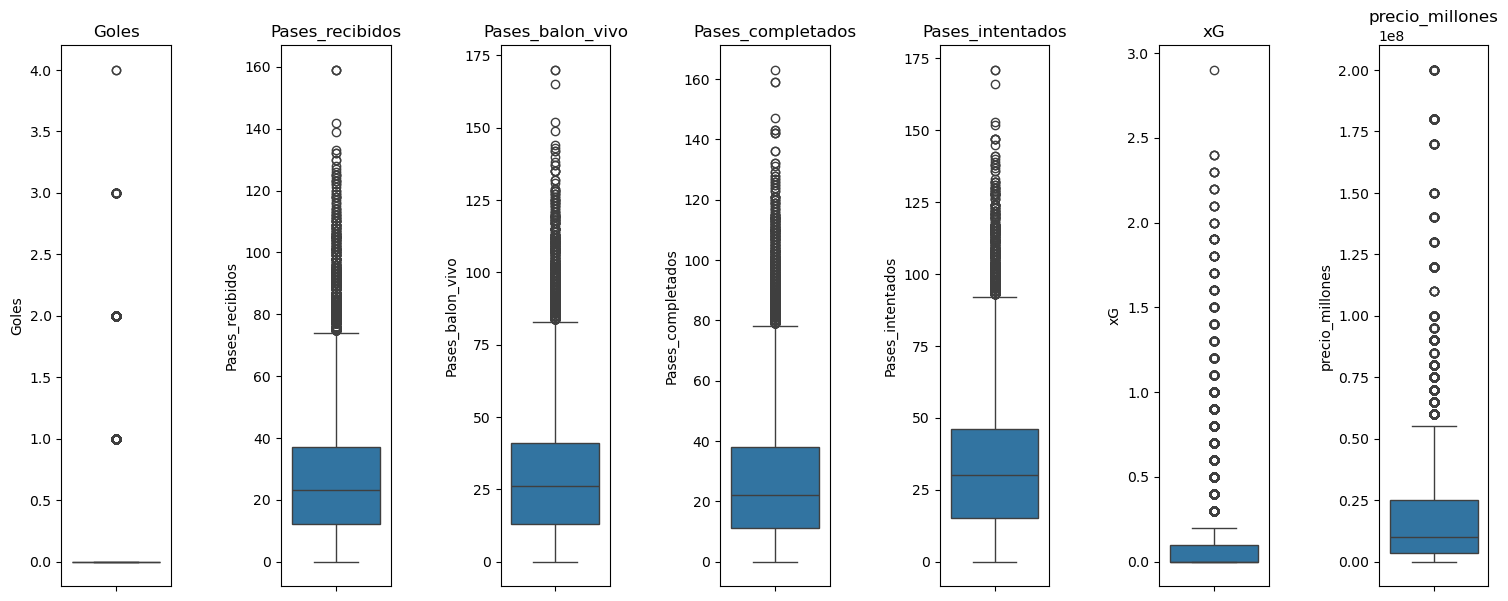

In [24]:
number_columns = dfescojido[["Jugador", "Nacionalidad", "Posicion", "Edad", "Dia_partido", "Goles", "Pases_recibidos", "Pases_balon_vivo", "Pases_completados", "Pases_intentados", "xG", "precio_millones"]].select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(15, 6))
plt.tight_layout()

for i, variable in enumerate(number_columns):
    sns.boxplot(y=dfescojido[variable], ax=axes[i])
    axes[i].set_title(f"{variable}")
plt.subplots_adjust(wspace=1) 
plt.show()

In [25]:
dfescojido

Jugador Nacionalidad Posicion    Edad  \
37429  Þorir Johann Helgason       is ISL       LM  24.239   
37176  Þorir Johann Helgason       is ISL       AM  24.232   
36746  Þorir Johann Helgason       is ISL       AM  24.225   
36325  Þorir Johann Helgason       is ISL       DM  24.217   
36110  Þorir Johann Helgason       is ISL       LW  24.211   
...                      ...          ...      ...     ...   
25891           Aaron Martin       es ESP    LB,WB  27.146   
25653           Aaron Martin       es ESP       WB  27.132   
25197           Aaron Martin       es ESP       WB  27.124   
24784           Aaron Martin       es ESP    WB,LM  27.117   
25245  Aaron Ciammaglichella       it ITA       CM  19.212   

               Dia_partido  Goles  Tiros Totales   xG  npxG  xAG  \
37429  2025-05-25 00:00:00    0.0            0.0  0.0   0.0  0.0   
37176  2025-05-18 00:00:00    0.0            1.0  0.1   0.1  0.1   
36746  2025-05-11 00:00:00    0.0            0.0  0.0   0.0  0.0   
36325  2025-05-03 00:00:00    0.0            2.0  0.1   0.1  0.0   
36110  2025-04-27 00:00:00    0.0            0.0  0.0   0.0  0.0   
...                    ...    ...            ...  ...   ...  ...   
25891  2024-09-15 00:00:00    0.0            1.0  0.0   0.0  0.3   
25653  2024-09-01 00:00:00    0.0            0.0  0.0   0.0  0.1   
25197  2024-08-24 00:00:00    0.0            1.0  0.0   0.0  0.0   
24784  2024-08-17 00:00:00    0.0            0.0  0.0   0.0  0.0   
25245  2024-08-25 00:00:00    0.0            0.0  0.0   0.0  0.0   

       Acciones_que_crean_tiros  Pases_intentados  Pases_progresivos  \
37429                       1.0               9.0                0.0   
37176                       1.0              12.0                1.0   
36746                       0.0              30.0                3.0   
36325                       0.0              23.0                1.0   
36110                       0.0               4.0                1.0   
...                         ...               ...                ...   
25891                       9.0              56.0                6.0   
25653                       2.0              55.0                5.0   
25197                       4.0              40.0                5.0   
24784                       2.0              32.0                1.0   
25245                       0.0               0.0                0.0   

       Regates_exitosos  Pases_medios_completados  Pases_largos_completados  \
37429               1.0                       2.0                       1.0   
37176               0.0                       3.0                       1.0   
36746               1.0                      12.0                       5.0   
36325               0.0                       3.0                       4.0   
36110               0.0                       2.0                       0.0   
...                 ...                       ...                       ...   
25891               0.0                       8.0                       6.0   
25653               0.0                      19.0                       6.0   
25197               0.0                      12.0                       2.0   
24784               1.0                      10.0                       1.0   
25245               0.0                       0.0                       0.0   

        xA  Pases_en_ultimo_tercio  Pases_balon_vivo  Pases_balon_muerto  \
37429  0.0                     0.0               5.0                 4.0   
37176  0.1                     0.0               8.0                 4.0   
36746  0.0                     1.0              24.0                 6.0   
36325  0.0                     3.0              22.0                 1.0   
36110  0.0                     1.0               4.0                 0.0   
...    ...                     ...               ...                 ...   
25891  0.7                     5.0              45.0                11.0   
25653  0.6                     6.0   

## 3. Construcción del modelo (Estudiante 1)

A continuación se va a mostrar de forma sencilla una creación del modelo. Para las métricas se utilizan métodos ya predefinidos de LinearRegression(), para el RMSE y el MAE se utilizan también funciones de sklearn. Cabe aclarar que se hace una iteración para encontrar que conjunto aleatorio tiene los mejores resultados en el modelo.

In [26]:

dffinal = dfescojido
dffinal
# 3) Selección de numéricas y armado de matrices
number_columns = dffinal.select_dtypes(include=[np.number]).columns
test  = dffinal[number_columns].dropna()
train = test.drop(columns=['precio_millones'])

print(train.shape)  # esperado: (15912, 33)

r_train_max = 0
i_train= 0
r_test_max = 0
i_test = 0
print("Buscando mejor random_state...", end='\r')
for i in range (10):
    print(f"=== Iteración {i+1} ===", end='\r')
    X_train, X_test, y_train, y_test = train_test_split(
        train, test["precio_millones"], test_size=0.3, random_state=i
    )

    reg = LinearRegression().fit(X_train, y_train)

    r_train = reg.score(X_train, y_train)
    r_test = reg.score(X_test, y_test)
    if r_train > r_train_max:
        r_train_max = r_train
        i_train = i
    if r_test > r_test_max:
        r_test_max = r_test
        i_test = i

X_train, X_test, y_train, y_test = train_test_split(
        train, test["precio_millones"], test_size=0.3, random_state=i_test
    )
print("_____________Máximo_____________")
print("Train MAE:",  mean_absolute_error(y_train, reg.predict(X_train)))
print("Test MAE:",   mean_absolute_error(y_test,  reg.predict(X_test)))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print("Test RMSE:",  np.sqrt(mean_squared_error(y_test,  reg.predict(X_test))))
print("Train R²:",   reg.score(X_train, y_train))
print("Test R²:",    reg.score(X_test,  y_test))
print("________________________________\n")

(13123, 33)
_____________Máximo_____________
Train MAE: 15101467.645596402
Test MAE: 15216898.231891772
Train RMSE: 22405507.091746185
Test RMSE: 21720232.111232672
Train R²: 0.13251658332216076
Test R²: 0.15453817051454477
________________________________



## 4. Construcción del pipeline (Estudiante 1)

### 4.1 Creando función de limpieza de datos

Ahora se va a realizar la integración de todos los pasos de la limpieza en una única función. Esta función se va a utilizar luego en el pipeline y agrupa las principales limpiezas de los datos que se han trabajado.

In [27]:
import pandas as pd
import numpy as np

def limpiar_datos(df: pd.DataFrame) -> pd.DataFrame:

    df = df.copy()

    # 1) market_value → precio_millones (en unidades monetarias, no “millones”)
    if 'market_value' in df.columns:
        mv = (
            df['market_value']
            .astype('string')
            .str.lower()
            .str.strip()
            .replace({'-': np.nan, 'error': np.nan})
        )
        # Captura número con posible decimal y sufijo m/k
        ext = mv.str.extract(r'€?\s*([\d]+(?:\.[\d]+)?)\s*([mk]?)', expand=True)
        ext.columns = ['cantidad', 'sufijo']
        cantidad = pd.to_numeric(ext['cantidad'], errors='coerce')  # respeta '.' como decimal
        mult = ext['sufijo'].map({'m': 1_000_000.0, 'k': 1_000.0}).fillna(1.0)
        df['precio_millones'] = cantidad * mult
    
        df = df[df['precio_millones'] < 1e10*0.1]

    # 2) Dia_partido: quitar sufijos y parsear con formato
    if 'Dia_partido' in df.columns:
        col = df['Dia_partido'].astype('string')
        for suf in [" North", " West", " Derby", " El", " Choc"]:
            col = col.str.replace(suf, "", regex=False)
        df['Dia_partido'] = pd.to_datetime(col, format="%A %B %d, %Y")

    # 3) Edad: normalizar y convertir a float
    if 'Edad' in df.columns:
        df['Edad'] = (
            df['Edad'].astype('string').str.replace('-', '.', regex=False)
        )
        df['Edad'] = df['Edad'].astype(float)  # sin errors='coerce' para replicar el lab

    # 4) Correcciones puntuales de Nacionalidad (si aplica)
    if {'Jugador', 'Nacionalidad'}.issubset(df.columns):
        df.loc[df['Jugador'].eq('Fer Lopez'), 'Nacionalidad'] = 'es ESP'
        df.loc[df['Jugador'].eq('Mateus Mane'), 'Nacionalidad'] = 'pt POR'
    
    # 5) Quitar columnas duplicadas (por contenido)
    df = df.loc[:, ~df.T.duplicated()]

    # 6) Goles entre 0 y 15
    if 'Goles' in df.columns:
        df = df[(df['Goles'] >= 0) & (df['Goles'] <= 15)]
    
    df = pd.get_dummies(df, columns=['Nacionalidad'], drop_first=False, dtype=float)

   
    return df




#### 4.2 Pipeline

##### 4.2.1 Creación del Pipeline

Ahora se hace una función que pueda utilizarse junto con la api de sklearn (por eso el Base Estimator y el RegressorMixin). Además se hace uso de la clase Pipeline para luego poder guardar y exportar el modelo. 

In [28]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from typing import Optional


class FutAlpesRegressionPipeline(BaseEstimator, RegressorMixin):
    def __init__(self):
        print("Inicializando el pipeline de regresión FutAlpes...")
        self.pipeline = Pipeline([
            ('regressor', LinearRegression())
        ])

        self.model = LinearRegression()
        self.trained = False
        self.feature_columns_: Optional[list[str]] = None

    

    def fit(self, X: pd.DataFrame, y = None):
        print("Entrenando el modelo...")
        data = X.copy()
        
        dffinal = limpiar_datos(data)
        number_columns = dffinal.select_dtypes(include=[np.number]).columns
        data_test  = dffinal[number_columns].dropna()
        data_train = data_test.drop(columns=['precio_millones'])
        
        print(number_columns)
        r_train_max = 0
        i_train = 0
        r_test_max = 0
        i_test = 0

        self.feature_columns_ = data_train.columns.tolist()

        print("Buscando mejor random_state...", end='\r')
        for i in range(100):
            X_train, X_test, y_train, y_test = train_test_split(
            data_train, data_test['precio_millones'], test_size=0.3, random_state=i
            )
            self.pipeline.fit(X_train, y_train)
            r_train = self.pipeline.score(X_train, y_train)
            r_test = self.pipeline.score(X_test, y_test)
            if r_train > r_train_max:
                r_train_max = r_train
                i_train = i
            if r_test > r_test_max:
                r_test_max = r_test
                i_test = i

        X_train, X_test, y_train, y_test = train_test_split(
            data_train, data_test['precio_millones'], test_size=0.3, random_state=i_test
        )
        self.pipeline.fit(X_train, y_train)
        y_train_pred = self.pipeline.predict(X_train)
        y_test_pred = self.pipeline.predict(X_test)
        print("====== Model Performance ======")
        print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
        print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
        print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
        print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
        print("Train R²:", r2_score(y_train, y_train_pred))
        print("Test R²:", r2_score(y_test, y_test_pred))
        print("===============================\n")

        self.pipeline.fit(data_train, data_test["precio_millones"])
        self.is_fitted_ = True
        
        return self
        
    def arreglar_datos(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        df = limpiar_datos(df)
        return df
    
    def predict(self, X: pd.DataFrame) -> np.ndarray:
        if not self.is_fitted_:
            raise RuntimeError("El modelo no está entrenado. Llama primero a .fit().")

        df = limpiar_datos(X.copy())
        df_num = df.select_dtypes(include=[np.number]).copy()

        # Asegurar que existen todas las columnas usadas en entrenamiento
        # (si faltan, las creamos con 0; si sobran, las ignoramos)
        for col in self.feature_columns_:
            if col not in df_num.columns:
                df_num[col] = 0.0

        X_pred = df_num[self.feature_columns_].copy()

        # Cuidado: si llega a estar la columna objetivo en X, quítala
        if 'precio_millones' in X_pred.columns:
            X_pred = X_pred.drop(columns=['precio_millones'])

        # Eliminar filas con NaN para evitar errores
        X_pred = X_pred.dropna()

        return self.pipeline.predict(X_pred)

Ahora se utiliza el pipeline revisando que todo haya funcionado bien.

In [29]:
datos = pd.read_csv(db_location, sep=',')

modelo = FutAlpesRegressionPipeline()
modelo.fit(datos)

Inicializando el pipeline de regresión FutAlpes...
Entrenando el modelo...
Index(['Edad', 'Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG',
       'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_progresivos',
       'Regates_exitosos',
       ...
       'Nacionalidad_tr TUR', 'Nacionalidad_ua UKR', 'Nacionalidad_us USA',
       'Nacionalidad_uy URU', 'Nacionalidad_uz UZB', 'Nacionalidad_ve VEN',
       'Nacionalidad_wls WAL', 'Nacionalidad_xk KVX', 'Nacionalidad_zm ZAM',
       'Nacionalidad_zw ZIM'],
      dtype='object', length=135)
====== Model Performance ======
Train MAE: 12851047.087402212
Test MAE: 13039536.45814978
Train RMSE: 19676542.227049462
Test RMSE: 19859335.44956283
Train R²: 0.26598699887663535
Test R²: 0.2895912598378769



FutAlpesRegressionPipeline()

##### 4.2.2 Guardado del Pipeline

Se ejecuta un modelo y se guarda en joblib para poderse cargar en otros ambientes

In [30]:
datos = pd.read_csv(db_location, sep=',')
model_pipeline = FutAlpesRegressionPipeline()
model_pipeline.fit(datos)

dump(model_pipeline, "pipeline.joblib")
print("Modelo exportado como model_pipeline.joblib\n")

Inicializando el pipeline de regresión FutAlpes...
Entrenando el modelo...
Index(['Edad', 'Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG',
       'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_progresivos',
       'Regates_exitosos',
       ...
       'Nacionalidad_tr TUR', 'Nacionalidad_ua UKR', 'Nacionalidad_us USA',
       'Nacionalidad_uy URU', 'Nacionalidad_uz UZB', 'Nacionalidad_ve VEN',
       'Nacionalidad_wls WAL', 'Nacionalidad_xk KVX', 'Nacionalidad_zm ZAM',
       'Nacionalidad_zw ZIM'],
      dtype='object', length=135)
====== Model Performance ======
Train MAE: 12851047.087402212
Test MAE: 13039536.45814978
Train RMSE: 19676542.227049462
Test RMSE: 19859335.44956283
Train R²: 0.26598699887663535
Test R²: 0.2895912598378769

Modelo exportado como model_pipeline.joblib



##### 4.2.3 Cargar y probar modelo

In [31]:
pipeline = load("pipeline.joblib")
db_location = './Datos/datos_entrenamiento_laboratorio1(train_data).csv'
datos = pd.read_csv(db_location, sep=',')

pipeline.predict(datos.head())

C:\Users\diego\AppData\Local\Temp\ipykernel_9196\38865036.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[col] = 0.0
C:\Users\diego\AppData\Local\Temp\ipykernel_9196\38865036.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[col] = 0.0
C:\Users\diego\AppData\Local\Temp\ipykernel_9196\38865036.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

array([23877838.79123343, 44194858.70463109, 28222675.32660525])

Por último se evidenció que el modelo funciona y predice los precios de los jugadores. Luego se va a revisar cómo mejorar las métricas de los jugadores para hacer un segundo Pipeline con las modificaciones. Ese será el pipeline con el  cuál se van a generar las predicciones a guardar.

# 5. Supuestos de la regresion (Estudiante 2)

## Colinealidad

In [32]:
datos = pd.read_csv(db_location, sep=',')

dffinal = limpiar_datos(datos)

X = dffinal.select_dtypes(include=[np.number]).drop(columns=["precio_millones"])
y = dffinal["precio_millones"]

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr().abs()


umbral = 0.7
correlaciones_altas = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
correlaciones_altas.columns = ["Var1", "Var2", "Correlación"]
correlaciones_altas = correlaciones_altas[correlaciones_altas["Correlación"] > umbral]

correlaciones_altas.sort_values("Correlación", ascending=False)

Var1                         Var2  Correlación
916           Pases_intentados             Pases_balon_vivo     0.987367
1774          Pases_balon_vivo            Pases_completados     0.985290
920           Pases_intentados            Pases_completados     0.983631
1785          Pases_balon_vivo              Pases_recibidos     0.972587
2251         Pases_completados              Pases_recibidos     0.957208
931           Pases_intentados              Pases_recibidos     0.953280
1292  Pases_medios_completados            Pases_completados     0.924173
396                         xG                         npxG     0.916417
1288  Pases_medios_completados             Pases_balon_vivo     0.906200
912           Pases_intentados     Pases_medios_completados     0.897967
1303  Pases_medios_completados              Pases_recibidos     0.861254
2702   Toques_en_zona_ofensiva  Pases_progresivos_recibidos     0.773241
1040         Pases_progresivos       Pases_en_ultimo_tercio     0.760539
661                        xAG                           xA     0.717219
1651    Pases_en_ultimo_tercio             Pases_balon_vivo     0.709831
1655    Pases_en_ultimo_tercio            Pases_completados     0.703230
285              Tiros Totales         Toques_en_area_rival     0.702204

Como se puede observar se tienen multiples variables con alta correlacion, por lo que solo nos quedaramos con una de cada grupo para poder reducir esto

In [34]:
def eliminar_variables_correlacionadas(df, umbral=0.9):
    
    corr_matrix = df.corr().abs()
    
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    eliminadas = [column for column in upper.columns if any(upper[column] > umbral)]
    
    df_filtrado = df.drop(columns=eliminadas, errors="ignore")
    
    return df_filtrado, eliminadas

In [35]:
umbral = 0.8 
X_filtrado, eliminadas = eliminar_variables_correlacionadas(X, umbral=umbral)

print("Variables eliminadas por colinealidad:\n", eliminadas)
print("\nShape original:", X.shape)
print("Shape reducido :", X_filtrado.shape)

Variables eliminadas por colinealidad:
 ['npxG', 'Pases_medios_completados', 'Pases_balon_vivo', 'Pases_completados', 'Pases_recibidos']

Shape original: (44787, 134)
Shape reducido : (44787, 129)


Con esto eliminamos las variables con una correlacion de mas del 80 con el fin de evitar colinealidad

## Linealidad de los datos

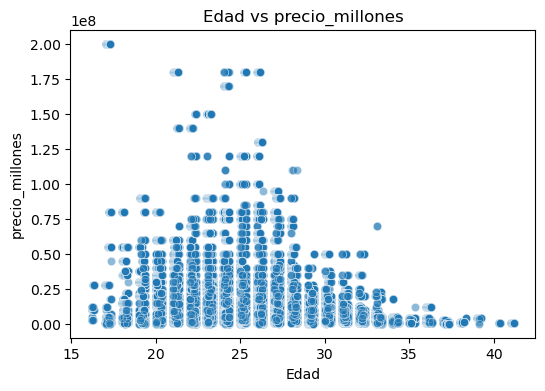

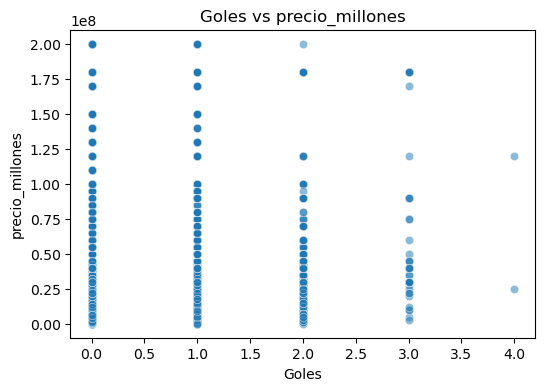

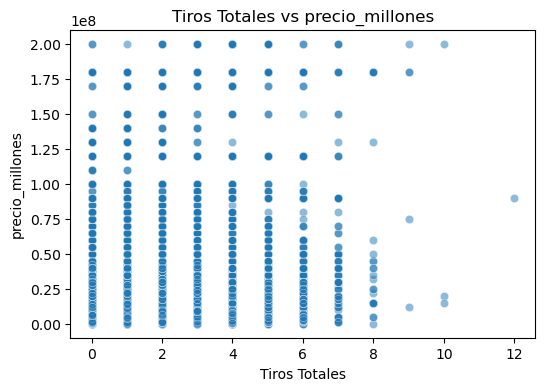

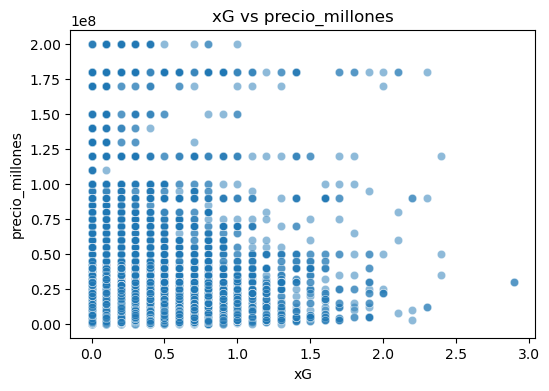

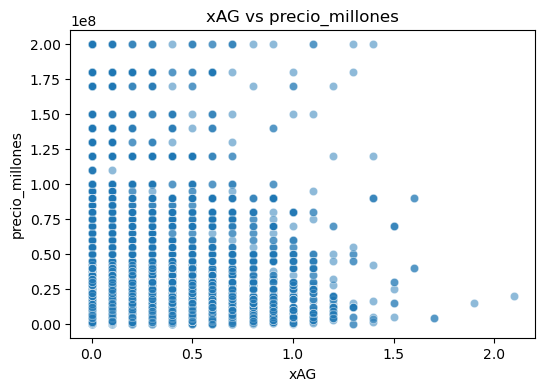

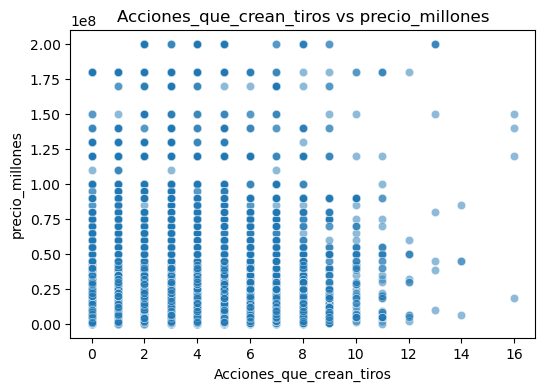

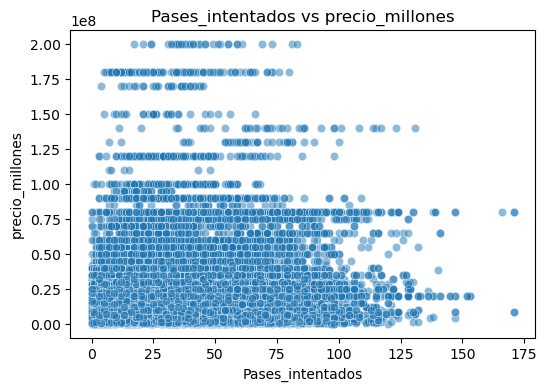

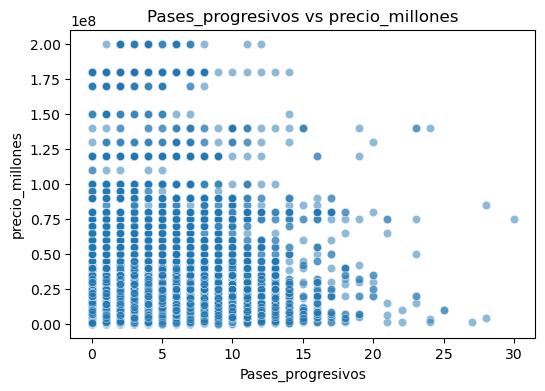

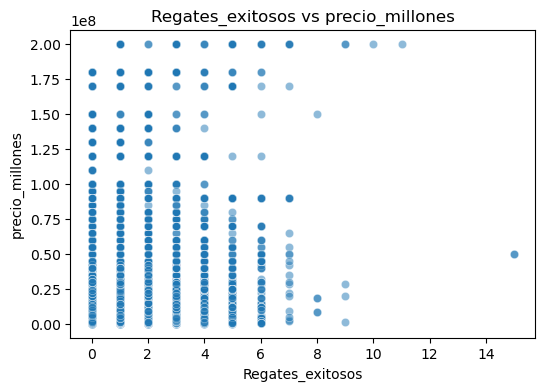

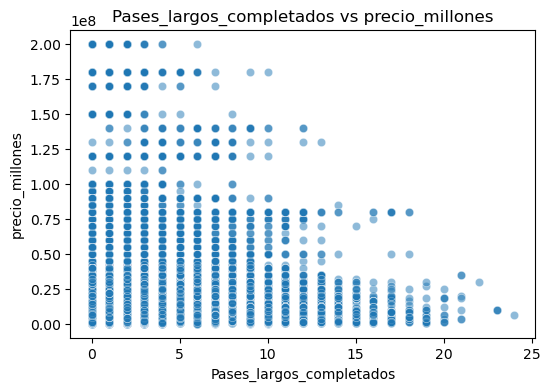

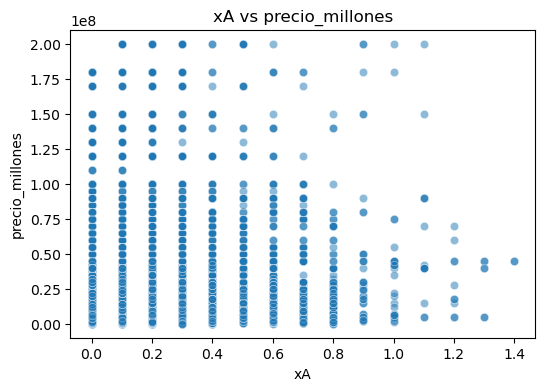

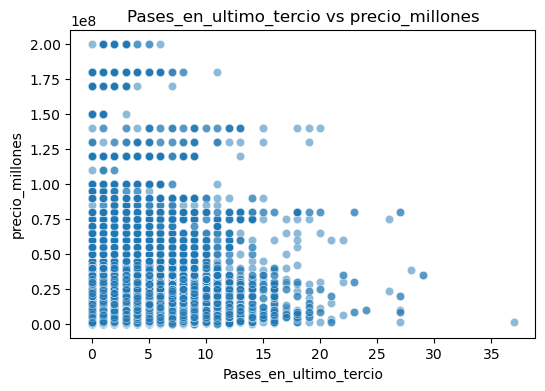

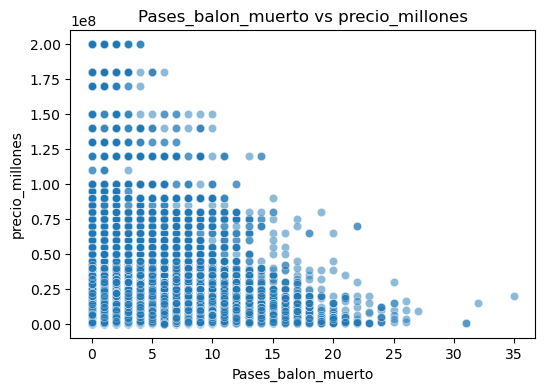

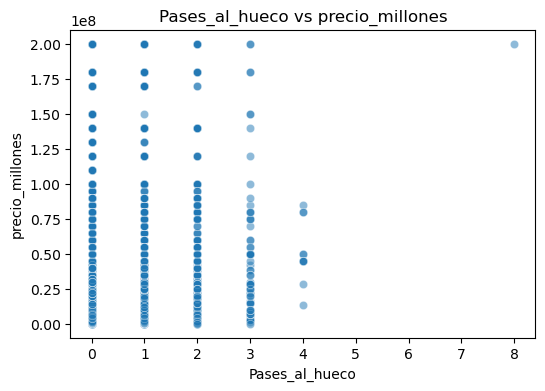

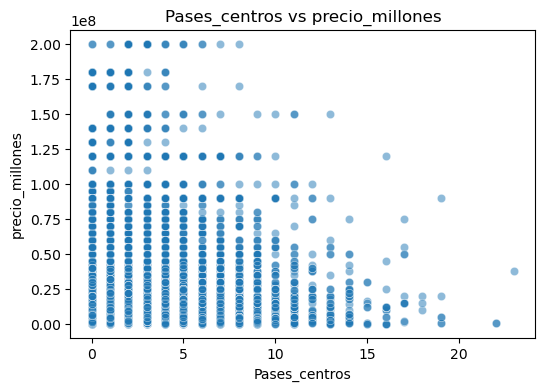

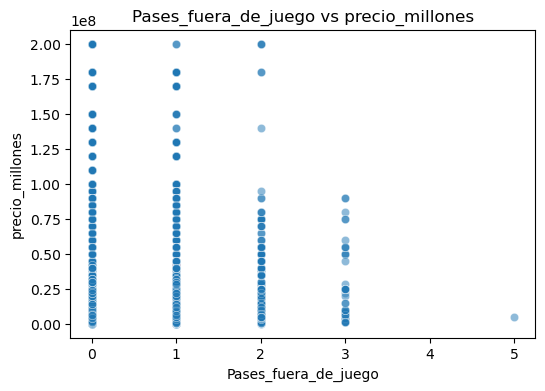

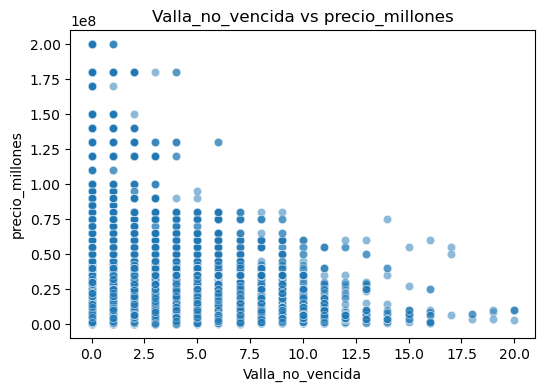

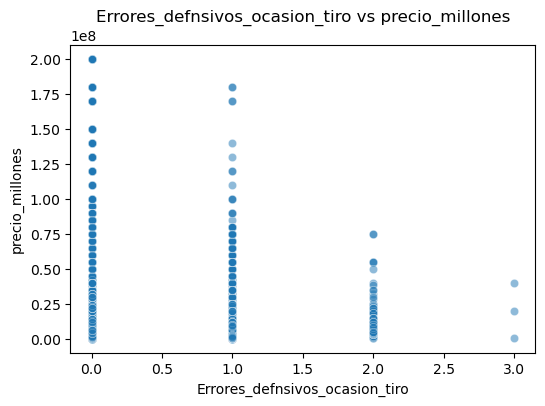

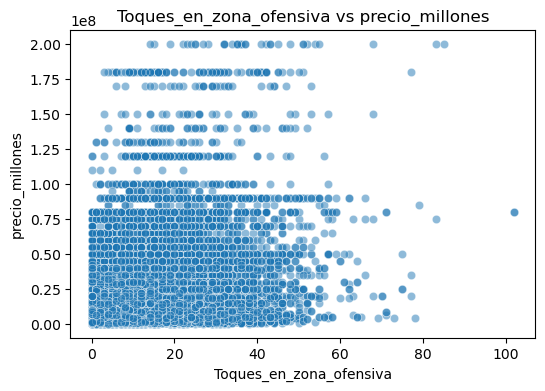

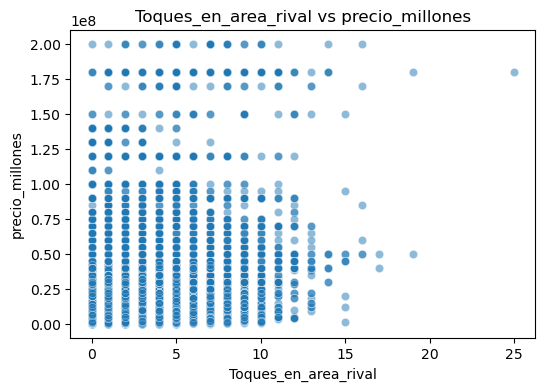

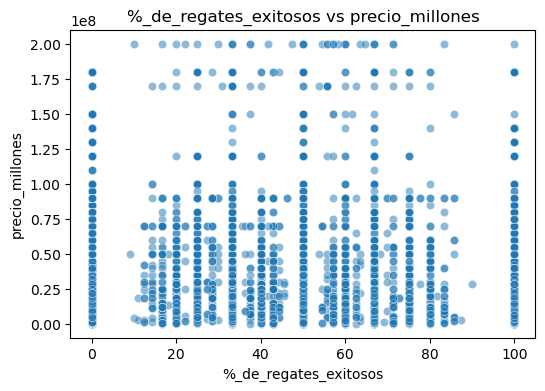

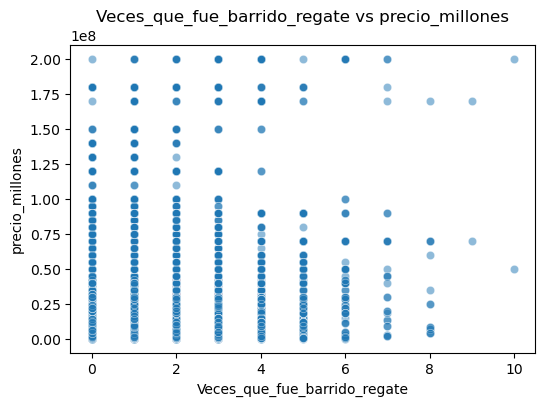

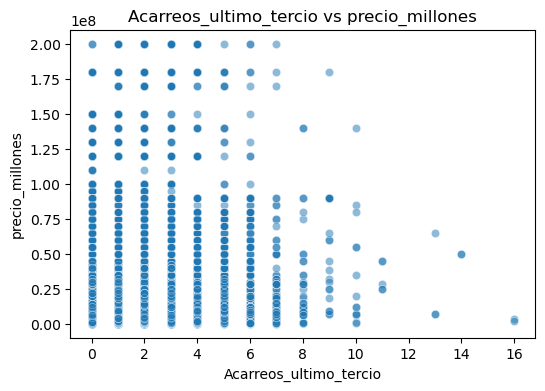

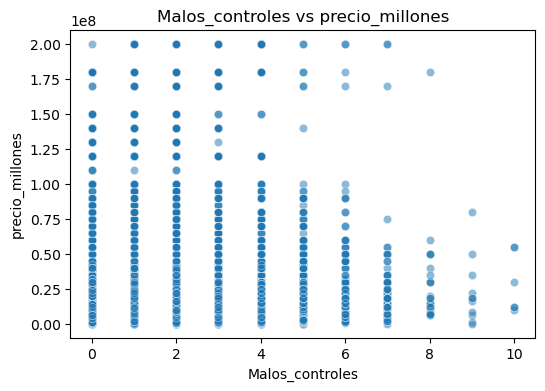

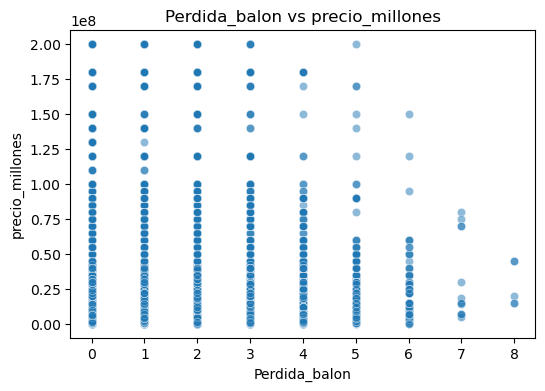

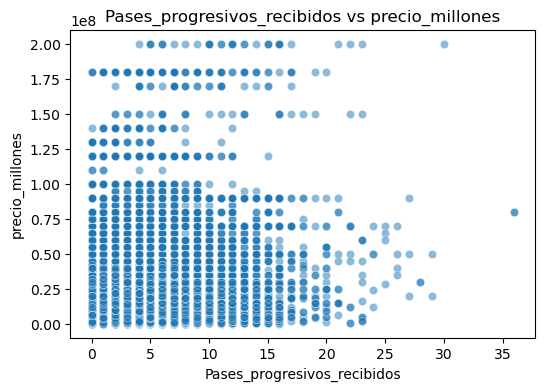

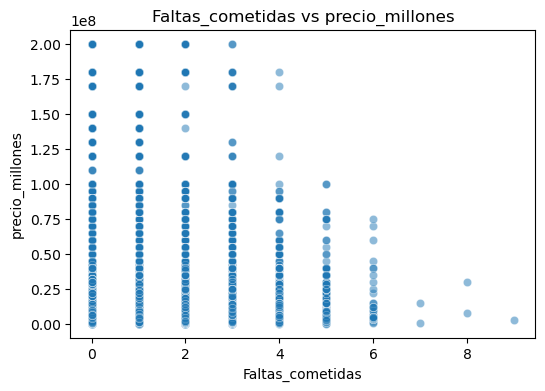

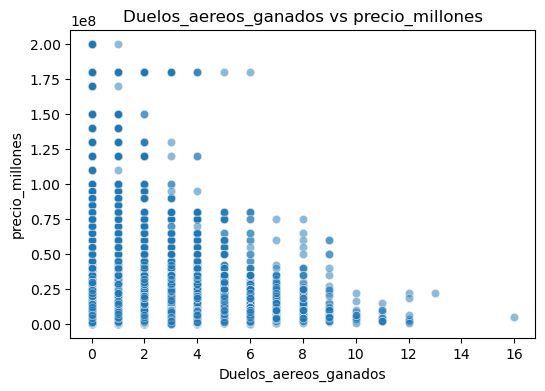

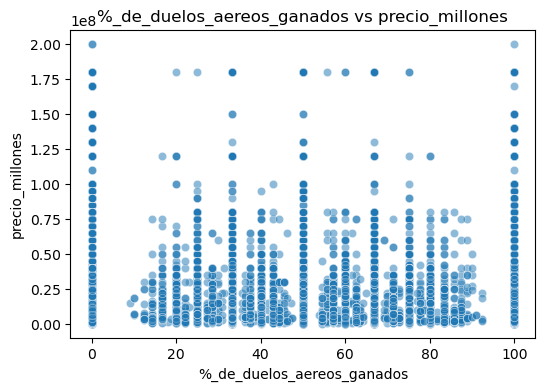

In [36]:
cols_continuas = [col for col in X_filtrado.columns if "Nacionalidad" not in col]

for col in cols_continuas:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_filtrado[col], y=y, alpha=0.5)
    plt.title(f"{col} vs precio_millones")
    plt.xlabel(col)
    plt.ylabel("precio_millones")
    plt.show()

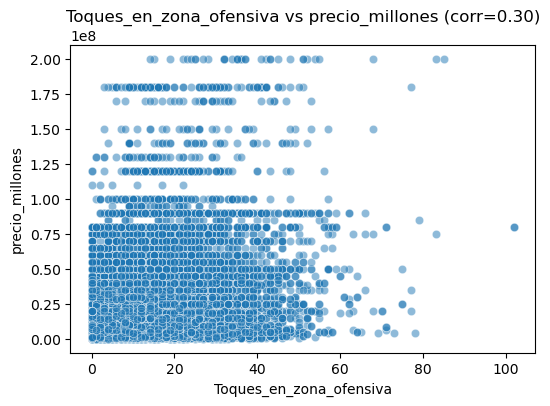

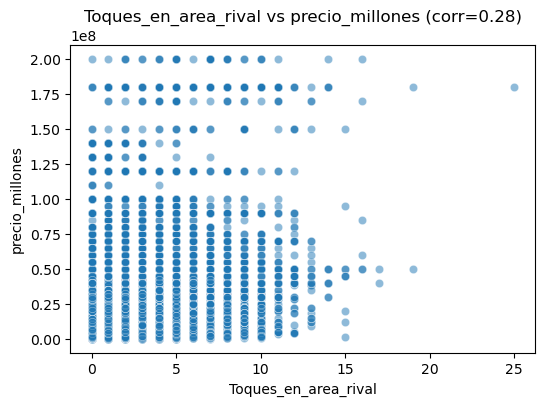

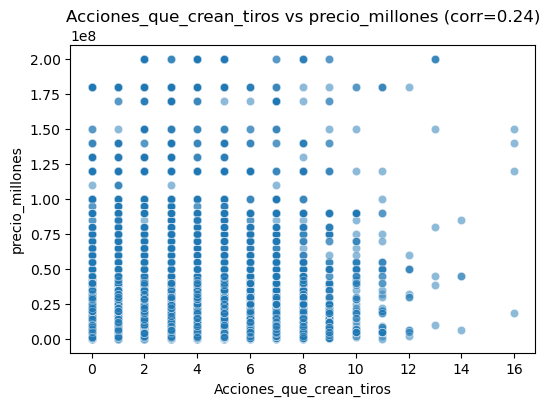

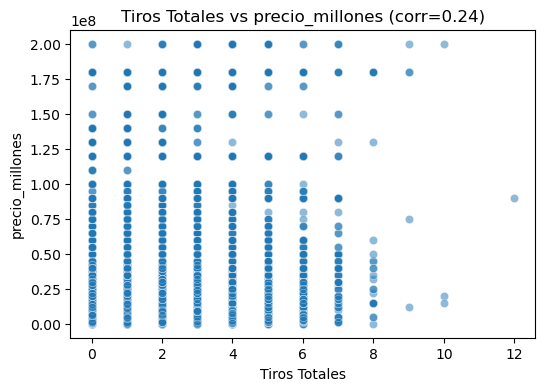

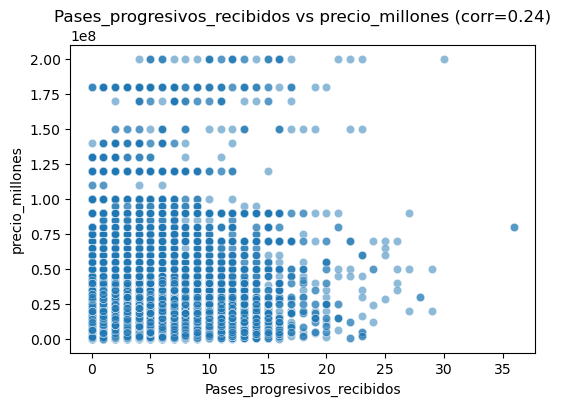

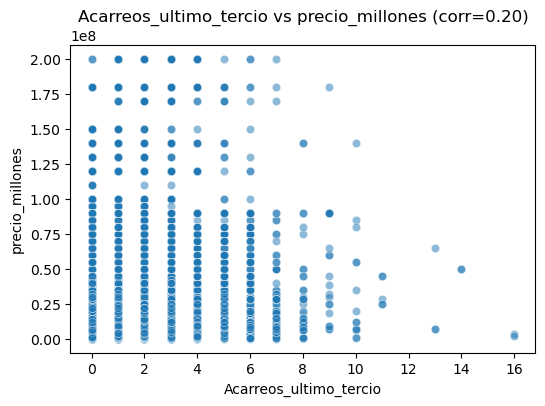

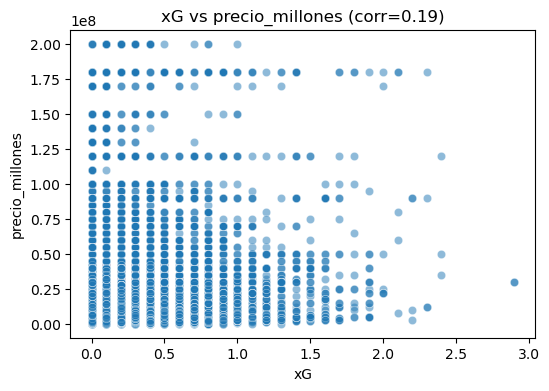

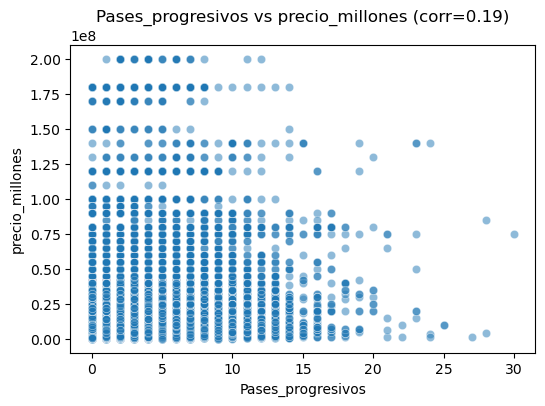

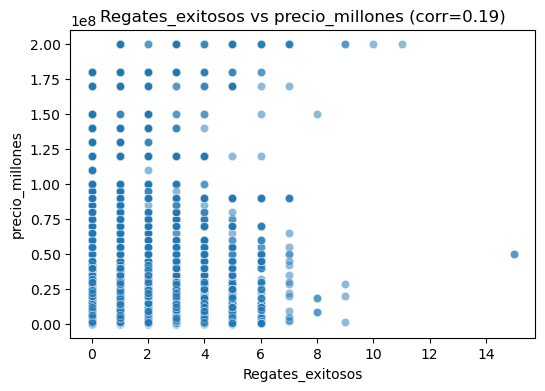

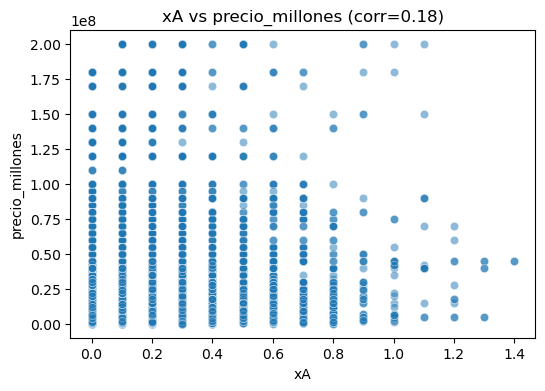

In [37]:
correlaciones_objetivo = X_filtrado[cols_continuas].corrwith(y)

correlaciones_ordenadas = correlaciones_objetivo.abs().sort_values(ascending=False)

top_vars = [col for col in correlaciones_ordenadas.index if col != "Edad"][:10]

for col in top_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_filtrado[col], y=y, alpha=0.5)
    plt.title(f"{col} vs precio_millones (corr={correlaciones_objetivo[col]:.2f})")
    plt.xlabel(col)
    plt.ylabel("precio_millones")
    plt.show()

Con esto obtenemos las variables mas correlacionadas con el precio en millones del jugador, con el fin de transformarlas y acercarlas mas a la linealidad.

In [38]:
import numpy as np
from scipy.stats import skew

# Copia para no modificar el original
X_trans = X_filtrado.copy()

transformadas = {}

for col in top_vars:
    data = X_filtrado[col]
    asimetria = skew(data)

    if asimetria < -0.5:  # cola izquierda → aplicar potencia
        X_trans[col] = np.power(data, 2)   # o np.power(data, 3)
        transformadas[col] = "potencia (x^2)"
    elif asimetria > 0.5:  # cola derecha → aplicar log1p
        X_trans[col] = np.log1p(data)
        transformadas[col] = "log1p"
    else:
        transformadas[col] = "sin cambio"

print("Transformaciones aplicadas:")
for k,v in transformadas.items():
    print(f"{k}: {v}")


Transformaciones aplicadas:
Toques_en_zona_ofensiva: log1p
Toques_en_area_rival: log1p
Acciones_que_crean_tiros: log1p
Tiros Totales: log1p
Pases_progresivos_recibidos: log1p
Acarreos_ultimo_tercio: log1p
xG: log1p
Pases_progresivos: log1p
Regates_exitosos: log1p
xA: log1p


In [39]:
nan_cols = X_trans.isna().sum()
print(nan_cols[nan_cols > 0])

df_limpio = X_filtrado.copy()

# 1. Eliminar columnas con muchos nulos
df_limpio = df_limpio.drop(columns=["%_de_regates_exitosos", "%_de_duelos_aereos_ganados"])
df_limpio = df_limpio.copy()
df_limpio["precio_millones"] = dffinal["precio_millones"].values
# 2. Eliminar filas con edad nula
df_limpio = df_limpio.dropna(subset=["Edad"])


Edad                             18
%_de_regates_exitosos         21658
%_de_duelos_aereos_ganados    16090
dtype: int64


Con esto eliminamos algunas columnas con muchos valores NaN y en la edad eliminamos 18 registros que estan con valores NaN con el fin de que los pueda procesar el modelo posteriormente

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = df_limpio.drop(columns=["precio_millones"])
y = df_limpio["precio_millones"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("====== Model Performance ======")
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("===============================\n")


====== Model Performance ======
Train MAE: 12069168.937707426
Test MAE: 11983051.760162469
Train RMSE: 18811750.914263625
Test RMSE: 18745979.006592546
Train R²: 0.2750452474133046
Test R²: 0.26296632105030415



Como podemos ver, con las transformaciones y eliminacion de la colinealidad logramos reducir los valores de MAE y RMSE con respecto al modelo antes de las transformaciones.

## Normalidad y Homocedasticidad

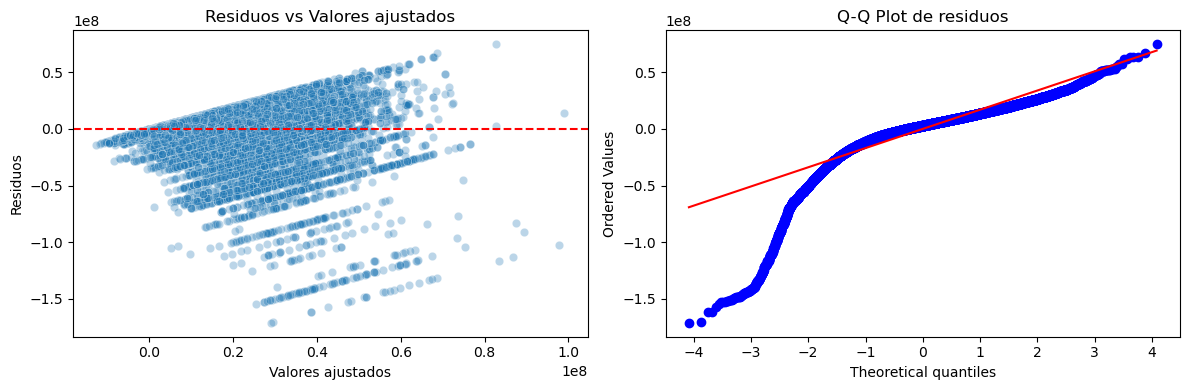

In [41]:
from scipy import stats

errors = (model.predict(X_train).ravel() - y_train.values.ravel())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x=model.predict(X_train).ravel(), 
                y=errors, alpha=0.3, ax=axes[0])
axes[0].axhline(0, color="red", linestyle="--")
axes[0].set_xlabel("Valores ajustados")
axes[0].set_ylabel("Residuos")
axes[0].set_title("Residuos vs Valores ajustados")

stats.probplot(errors, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de residuos")

plt.tight_layout()
plt.show()


Como se puede ver los puntos en la primera grafica estan distribuidos parcialmente de manera aleatoria sobre la linea roja, indicando que no hay homocedasticidad completa. Por otro lado podemos ver en el Q-Q plot, que los puntos se ajustan bastante bien a la linea, excepto por el inicio indicando que puede que todavia quedan valores atipicos o datos con distribuciones con una cola.

## analisis de los coeficientes

In [42]:
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": model.coef_.ravel()
})

coef_filtrados = coeficientes[~coeficientes["Variable"].str.startswith("Nacionalidad_")]

coef_filtrados = coef_filtrados.sort_values(by="Coeficiente", ascending=False)

display(coef_filtrados.head(15))   
display(coef_filtrados.tail(15))  

Variable   Coeficiente
4                              xAG  4.817713e+06
3                               xG  3.522683e+06
1                            Goles  3.191792e+06
13                  Pases_al_hueco  2.333910e+06
17  Errores_defnsivos_ocasion_tiro  1.357334e+06
19            Toques_en_area_rival  1.331924e+06
8                 Regates_exitosos  1.111210e+06
18         Toques_en_zona_ofensiva  4.492190e+05
20    Veces_que_fue_barrido_regate  4.429169e+05
15            Pases_fuera_de_juego  4.098360e+05
9         Pases_largos_completados  2.901530e+05
5         Acciones_que_crean_tiros  1.268713e+05
6                 Pases_intentados  1.224352e+05
11          Pases_en_ultimo_tercio  8.070974e+04
2                    Tiros Totales  2.947734e+04

Variable   Coeficiente
6              Pases_intentados  1.224352e+05
11       Pases_en_ultimo_tercio  8.070974e+04
2                 Tiros Totales  2.947734e+04
24  Pases_progresivos_recibidos  2.726434e+03
7             Pases_progresivos -5.572718e+04
21       Acarreos_ultimo_tercio -1.230098e+05
23                Perdida_balon -1.315836e+05
16             Valla_no_vencida -1.379100e+05
10                           xA -3.118876e+05
12           Pases_balon_muerto -3.569099e+05
22              Malos_controles -6.009340e+05
26        Duelos_aereos_ganados -9.771827e+05
25             Faltas_cometidas -1.014169e+06
0                          Edad -1.138684e+06
14                Pases_centros -1.442040e+06

C:\Users\diego\AppData\Local\Temp\ipykernel_9196\2681654890.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


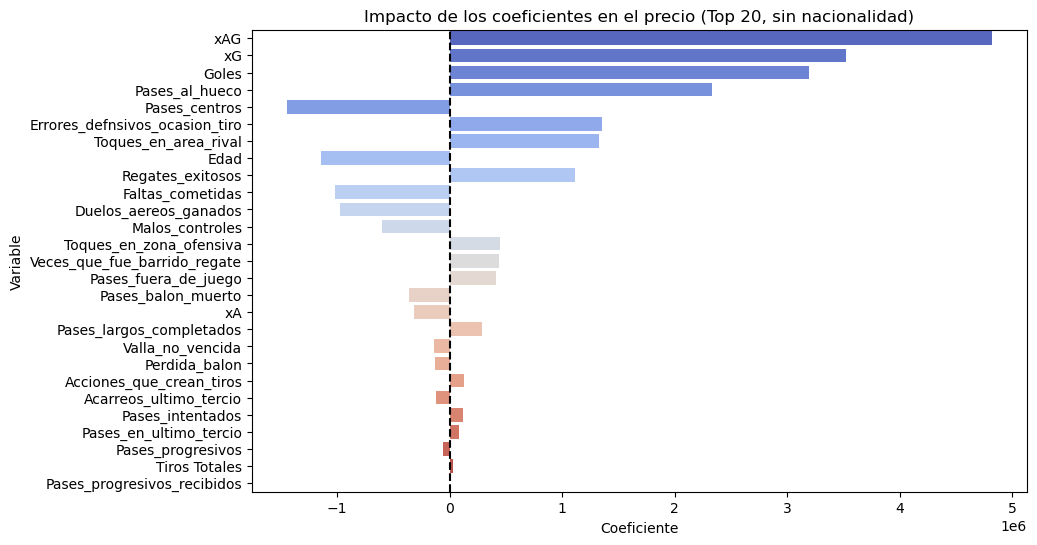

In [43]:
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": model.coef_.ravel()
})

coef_filtrados = coeficientes[~coeficientes["Variable"].str.startswith("Nacionalidad_")]

coef_filtrados = coef_filtrados.reindex(
    coef_filtrados["Coeficiente"].abs().sort_values(ascending=False).index
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=coef_filtrados.head(30), 
    x="Coeficiente", 
    y="Variable", 
    palette="coolwarm"
)
plt.title("Impacto de los coeficientes en el precio (Top 20, sin nacionalidad)")
plt.axvline(0, color="black", linestyle="--")
plt.show()

Aca podemos observar el impacto de los coeficientes en el precio, mostrando como algunas estadisticas como xAG,xG y goles son proporciales al precio (es decir que si sube esta estadistica el precio tambien), mientras que algunas otras como la Edad,Pases_centros y malos controles son inversamente proporcionales al precio.

# 6. Nuevo pipeline actualizado 

Finalmente se hace un nuevo Pipeline con la información nueva para generar datos más exactos

### 6.1 Nuevas funciones de limpieza

In [44]:
import pandas as pd
import numpy as np
from scipy.stats import skew


def eliminar_variables_correlacionadas(df, umbral=0.9):
    
    corr_matrix = df.corr().abs()
    
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    eliminadas = [column for column in upper.columns if any(upper[column] > umbral)]
    
    df_filtrado = df.drop(columns=eliminadas, errors="ignore")
    
    return df_filtrado, eliminadas

def limpiar_datos(df: pd.DataFrame, entrenamiento = False) -> pd.DataFrame:

    df = df.copy()

    # 1) market_value → precio_millones (en unidades monetarias, no “millones”)
    if 'market_value' in df.columns:
        mv = (
            df['market_value']
            .astype('string')
            .str.lower()
            .str.strip()
            .replace({'-': np.nan, 'error': np.nan})
        )
        # Captura número con posible decimal y sufijo m/k
        ext = mv.str.extract(r'€?\s*([\d]+(?:\.[\d]+)?)\s*([mk]?)', expand=True)
        ext.columns = ['cantidad', 'sufijo']
        cantidad = pd.to_numeric(ext['cantidad'], errors='coerce')  # respeta '.' como decimal
        mult = ext['sufijo'].map({'m': 1_000_000.0, 'k': 1_000.0}).fillna(1.0)
        df['precio_millones'] = cantidad * mult
    
        df = df[df['precio_millones'] < 1e10*0.1]

    # 2) Dia_partido: quitar sufijos y parsear con formato
    if 'Dia_partido' in df.columns:
        col = df['Dia_partido'].astype('string')
        for suf in [" North", " West", " Derby", " El", " Choc"]:
            col = col.str.replace(suf, "", regex=False)
        df['Dia_partido'] = pd.to_datetime(col, format="%A %B %d, %Y")

    # 3) Edad: normalizar y convertir a float
    if 'Edad' in df.columns:
        df['Edad'] = (
            df['Edad'].astype('string').str.replace('-', '.', regex=False)
        )
        df['Edad'] = df['Edad'].astype(float)  # sin errors='coerce' para replicar el lab

    # 4) Correcciones puntuales de Nacionalidad (si aplica)
    if {'Jugador', 'Nacionalidad'}.issubset(df.columns):
        df.loc[df['Jugador'].eq('Fer Lopez'), 'Nacionalidad'] = 'es ESP'
        df.loc[df['Jugador'].eq('Mateus Mane'), 'Nacionalidad'] = 'pt POR'
    
    # 5) Quitar columnas duplicadas (por contenido)
    df = df.loc[:, ~df.T.duplicated()]

    # 6) Goles entre 0 y 15
    if 'Goles' in df.columns:
        df = df[(df['Goles'] >= 0) & (df['Goles'] <= 15)]
    
    df = pd.get_dummies(df, columns=['Nacionalidad'], drop_first=False, dtype=float)

    

    # 7) eliminar correlaciones
    if entrenamiento:
        X = df.select_dtypes(include=[np.number]).drop(columns=["precio_millones"])
        y = df["precio_millones"]

        X_filtrado, eliminadas = eliminar_variables_correlacionadas(X, umbral=0.9)
        X_trans = X_filtrado.copy()
        transformadas = {}
        cols_continuas = [col for col in X_filtrado.columns if "Nacionalidad" not in col]
        correlaciones_objetivo = X_filtrado[cols_continuas].corrwith(y)
        correlaciones_ordenadas = correlaciones_objetivo.abs().sort_values(ascending=False)
        top_vars = [col for col in correlaciones_ordenadas.index if col != "Edad"][:10]

        
        for col in top_vars:
            data = X_filtrado[col]
            asimetria = skew(data)

            if asimetria < -0.5:  # cola izquierda → aplicar potencia
                X_trans[col] = np.power(data, 2)   # o np.power(data, 3)
                transformadas[col] = "potencia (x^2)"
            elif asimetria > 0.5:  # cola derecha → aplicar log1p
                X_trans[col] = np.log1p(data)
                transformadas[col] = "log1p"
            else:
                transformadas[col] = "sin cambio"

        print("Transformaciones aplicadas:")
        for k,v in transformadas.items():
            print(f"{k}: {v}")

        df_limpio = X_filtrado.copy()
        df_limpio = df_limpio.drop(columns=["%_de_regates_exitosos", "%_de_duelos_aereos_ganados"])
        df_limpio = df_limpio.copy()
        df_limpio["precio_millones"] = df["precio_millones"].values
        df_limpio = df_limpio.dropna(subset=["Edad"])

        df = df_limpio

    number_columns = df.select_dtypes(include=[np.number]).columns
    return df[number_columns]






### 6.2 Nueva Pipeline

In [45]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from typing import Optional


class FutAlpesRegressionPipeline(BaseEstimator, RegressorMixin):
    def __init__(self):
        print("Inicializando el pipeline de regresión FutAlpes...")
        self.pipeline = Pipeline([
            ('regressor', LinearRegression())
        ])

        self.model = LinearRegression()
        self.trained = False
        self.feature_columns_: Optional[list[str]] = None

    

    def fit(self, X: pd.DataFrame, y = None):
        print("Entrenando el modelo...")
        data = X.copy()
        
        dffinal = limpiar_datos(data,True)
        number_columns = dffinal.select_dtypes(include=[np.number]).columns
        data_test  = dffinal[number_columns].dropna()
        data_train = data_test.drop(columns=['precio_millones'])
        

        print(number_columns)
        
        rmse_min = math.inf
        i_test = 0

        self.feature_columns_ = data_train.columns.tolist()

        print("Buscando mejor random_state...", end='\r')
        for i in range(100):
            print(f"Probando random_state={i:03d}---", end='\r')
            X_train, X_test, y_train, y_test = train_test_split(
            data_train, data_test['precio_millones'], test_size=0.3, random_state=i
            )
            self.pipeline.fit(X_train, y_train)
            rmse = np.sqrt(mean_squared_error(y_test, self.pipeline.predict(X_test)))

            
            if rmse < rmse_min:
                rmse_min = rmse
                i_test = i
        
            

        X_train, X_test, y_train, y_test = train_test_split(
            data_train, data_test['precio_millones'], test_size=0.3, random_state=i_test
        )
        self.pipeline.fit(X_train, y_train)
        y_train_pred = self.pipeline.predict(X_train)
        y_test_pred = self.pipeline.predict(X_test)
        print()
        print("====== Model Performance ======")
        print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
        print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
        print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
        print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
        print("Train R²:", r2_score(y_train, y_train_pred))
        print("Test R²:", r2_score(y_test, y_test_pred))
        print("===============================\n")

        self.pipeline.fit(data_train, data_test["precio_millones"])
        self.is_fitted_ = True
        
        return self
        
    def arreglar_datos(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        df = limpiar_datos(df)
        return df
    
    def predict(self, X: pd.DataFrame) -> np.ndarray:
        if not self.is_fitted_:
            raise RuntimeError("El modelo no está entrenado. Llama primero a .fit().")

        df = limpiar_datos(X.copy())
        df_num = df.select_dtypes(include=[np.number]).copy()

        # Asegurar que existen todas las columnas usadas en entrenamiento
        # (si faltan, las creamos con 0; si sobran, las ignoramos)
        for col in self.feature_columns_:
            if col not in df_num.columns:
                df_num[col] = 0.0

        X_pred = df_num[self.feature_columns_].copy()

        # Cuidado: si llega a estar la columna objetivo en X, quítala
        if 'precio_millones' in X_pred.columns:
            X_pred = X_pred.drop(columns=['precio_millones'])

        # Eliminar filas con NaN para evitar errores
        X_pred = X_pred.dropna()

        return self.pipeline.predict(X_pred),X_pred

### 6.3 Guardar el modelo

In [46]:
datos = pd.read_csv(db_location, sep=',')

modelo = FutAlpesRegressionPipeline()
modelo.fit(datos)
dump(modelo, "pipeline_final.joblib")
print("Modelo exportado como model_pipeline.joblib\n")

Inicializando el pipeline de regresión FutAlpes...
Entrenando el modelo...
Transformaciones aplicadas:
Toques_en_zona_ofensiva: log1p
Toques_en_area_rival: log1p
Acciones_que_crean_tiros: log1p
Tiros Totales: log1p
Pases_progresivos_recibidos: log1p
Acarreos_ultimo_tercio: log1p
xG: log1p
Pases_progresivos: log1p
Regates_exitosos: log1p
xA: log1p
Index(['Edad', 'Goles', 'Tiros Totales', 'xG', 'xAG',
       'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_progresivos',
       'Regates_exitosos', 'Pases_medios_completados',
       ...
       'Nacionalidad_ua UKR', 'Nacionalidad_us USA', 'Nacionalidad_uy URU',
       'Nacionalidad_uz UZB', 'Nacionalidad_ve VEN', 'Nacionalidad_wls WAL',
       'Nacionalidad_xk KVX', 'Nacionalidad_zm ZAM', 'Nacionalidad_zw ZIM',
       'precio_millones'],
      dtype='object', length=129)
Probando random_state=099---..
====== Model Performance ======
Train MAE: 12115073.80414667
Test MAE: 11883861.604463637
Train RMSE: 19037922.783544652
Test RMSE: 18

### 6.4 Cargar y utilizar el modelo nuevo

In [47]:
pipeline = load("pipeline_final.joblib")

db_location = './Datos/datos_entrenamiento_laboratorio1(train_data).csv'
datos = pd.read_csv(db_location, sep=',')

pred, x_pred = pipeline.predict(datos)
x_pred["precio_millones"] = pred
x_pred["Jugador"] = datos.loc[x_pred.index, "Jugador"].values
x_pred = x_pred.loc[:, ~x_pred.columns.str.contains("Nacionalidad")]
x_pred

Edad  Goles  Tiros Totales   xG  xAG  Acciones_que_crean_tiros  \
0      29.343      0              6  1.2  0.0                         2   
1      26.290      0              0  0.0  0.7                         1   
4      20.046      0              2  0.7  0.2                         3   
5      25.219      0              1  0.3  0.1                         3   
6      23.086      1              1  0.1  0.0                         1   
...       ...    ...            ...  ...  ...                       ...   
57924  22.013      0              0  0.0  0.0                         1   
57925  21.205      1              4  0.2  0.0                         2   
57931  20.306      0              2  0.1  0.0                         0   
57932  28.273      0              0  0.0  0.0                         1   
57933  25.021      0              0  0.0  0.0                         3   

       Pases_intentados  Pases_progresivos  Regates_exitosos  \
0                    60                  6                 1   
1                    30                  2                 0   
4                    11                  0                 0   
5                    15                  1                 0   
6                     9                  1                 0   
...                 ...                ...               ...   
57924                34                  0                 0   
57925                 5                  0                 1   
57931                32                  3                 2   
57932                35                  3                 0   
57933                 9                  1                 1   

       Pases_medios_completados  Pases_largos_completados   xA  \
0                            14                         4  0.0   
1                             2                         1  0.1   
4                             3                         0  0.1   
5                             1                         0  0.0   
6                             1                         0  0.0   
...                         ...                       ...  ...   
57924                        12                        12  0.0   
57925                         2                         0  0.0   
57931                        10                         5  0.0   
57932                        13                         2  0.0   
57933                         4                         0  0.0   

       Pases_en_ultimo_tercio  Pases_balon_muerto  Pases_al_hueco  \
0                           4                   8               0   
1                           2                   0               0   
4                           0                   0               0   
5                           1                   0               0   
6                           1                   0               0   
...                       ...                 ...             ...   
57924                       0                   2               0   
57925                       0                   0               1   
57931                       2                   2               0   
57932                       6                   4               1   
57933                       1                   0               0   

       Pases_centros  Pases_fuera_de_juego  Valla_no_vencida  \
0                  8                     1                 0   
1                  1                     0                 1   
4                  1                     0                 1   
5                  0                     0                 0   
6                  0                     0                 0   
...              ...                   ...               ...   
57924              0                     0                 0   
57925              0                     0                 2   
57931              1                     1                 1   
57932              3                     1                 0   
57933        

### 6.5 Guardar archivos CSV

Se van a guardar dos archivos. Uno solo con la columna de los precios, el otro con la información completa de los jugadores junto con su precio. Esto se hace para facilitar el análisis de los resultados.

In [48]:
# Guardar solo la columna 'precio_millones' en Resultados/prediccion.csv
x_pred[["precio_millones"]].to_csv("Resultados/prediccion.csv", index=False)

# Guardar todo el DataFrame x_pred en Resultados/tablas_completas_resultados.csv
x_pred.to_csv("Resultados/tablas_completas_resultados.csv", index=False)